1. Problem Statement: 
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


Dataset Description:

Number of columns: 23


Date  - The date of observation

Location  -The common name of the location of the weather station

MinTemp  -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall  -The amount of rainfall recorded for the day in mm

Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine  -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. 

Cloud3pm -Fraction of sky obscured by cloud 

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from scipy import stats
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score

In [2]:
df = pd.read_csv('rainfall-prediction.csv')

In [3]:
df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [5]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.isnull().any()

Date             False
Location         False
MinTemp           True
MaxTemp           True
Rainfall          True
Evaporation       True
Sunshine          True
WindGustDir       True
WindGustSpeed     True
WindDir9am        True
WindDir3pm        True
WindSpeed9am      True
WindSpeed3pm      True
Humidity9am       True
Humidity3pm       True
Pressure9am       True
Pressure3pm       True
Cloud9am          True
Cloud3pm          True
Temp9am           True
Temp3pm           True
RainToday         True
RainTomorrow      True
dtype: bool

# Unique Values

In [8]:
df.nunique()

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
Evaporation       116
Sunshine          140
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
dtype: int64

In [9]:
df['RainToday'].unique()

array(['No', 'Yes', nan], dtype=object)

In [10]:
df['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

In [11]:
df = df.fillna(df.mean())

In [12]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.900000,0.6,5.302395,7.890896,W,44.000000,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.320988,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.100000,0.0,5.302395,7.890896,WNW,44.000000,NNW,...,44.0,25.0,1010.6,1007.8,4.336806,4.320988,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.700000,0.0,5.302395,7.890896,WSW,46.000000,W,...,38.0,30.0,1007.6,1008.7,4.336806,2.000000,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.000000,0.0,5.302395,7.890896,NE,24.000000,SE,...,45.0,16.0,1017.6,1012.8,4.336806,4.320988,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.300000,1.0,5.302395,7.890896,W,41.000000,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.400000,0.0,5.302395,7.890896,E,31.000000,SE,...,51.0,24.0,1024.6,1020.3,4.336806,4.320988,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.300000,0.0,5.302395,7.890896,NNW,22.000000,SE,...,56.0,21.0,1023.5,1019.1,4.336806,4.320988,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.900000,0.0,5.302395,7.890896,N,37.000000,SE,...,53.0,24.0,1021.0,1016.8,4.336806,4.320988,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.000000,0.0,5.302395,7.890896,SE,28.000000,SSE,...,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,No,No


# Exploratory Data Analysis

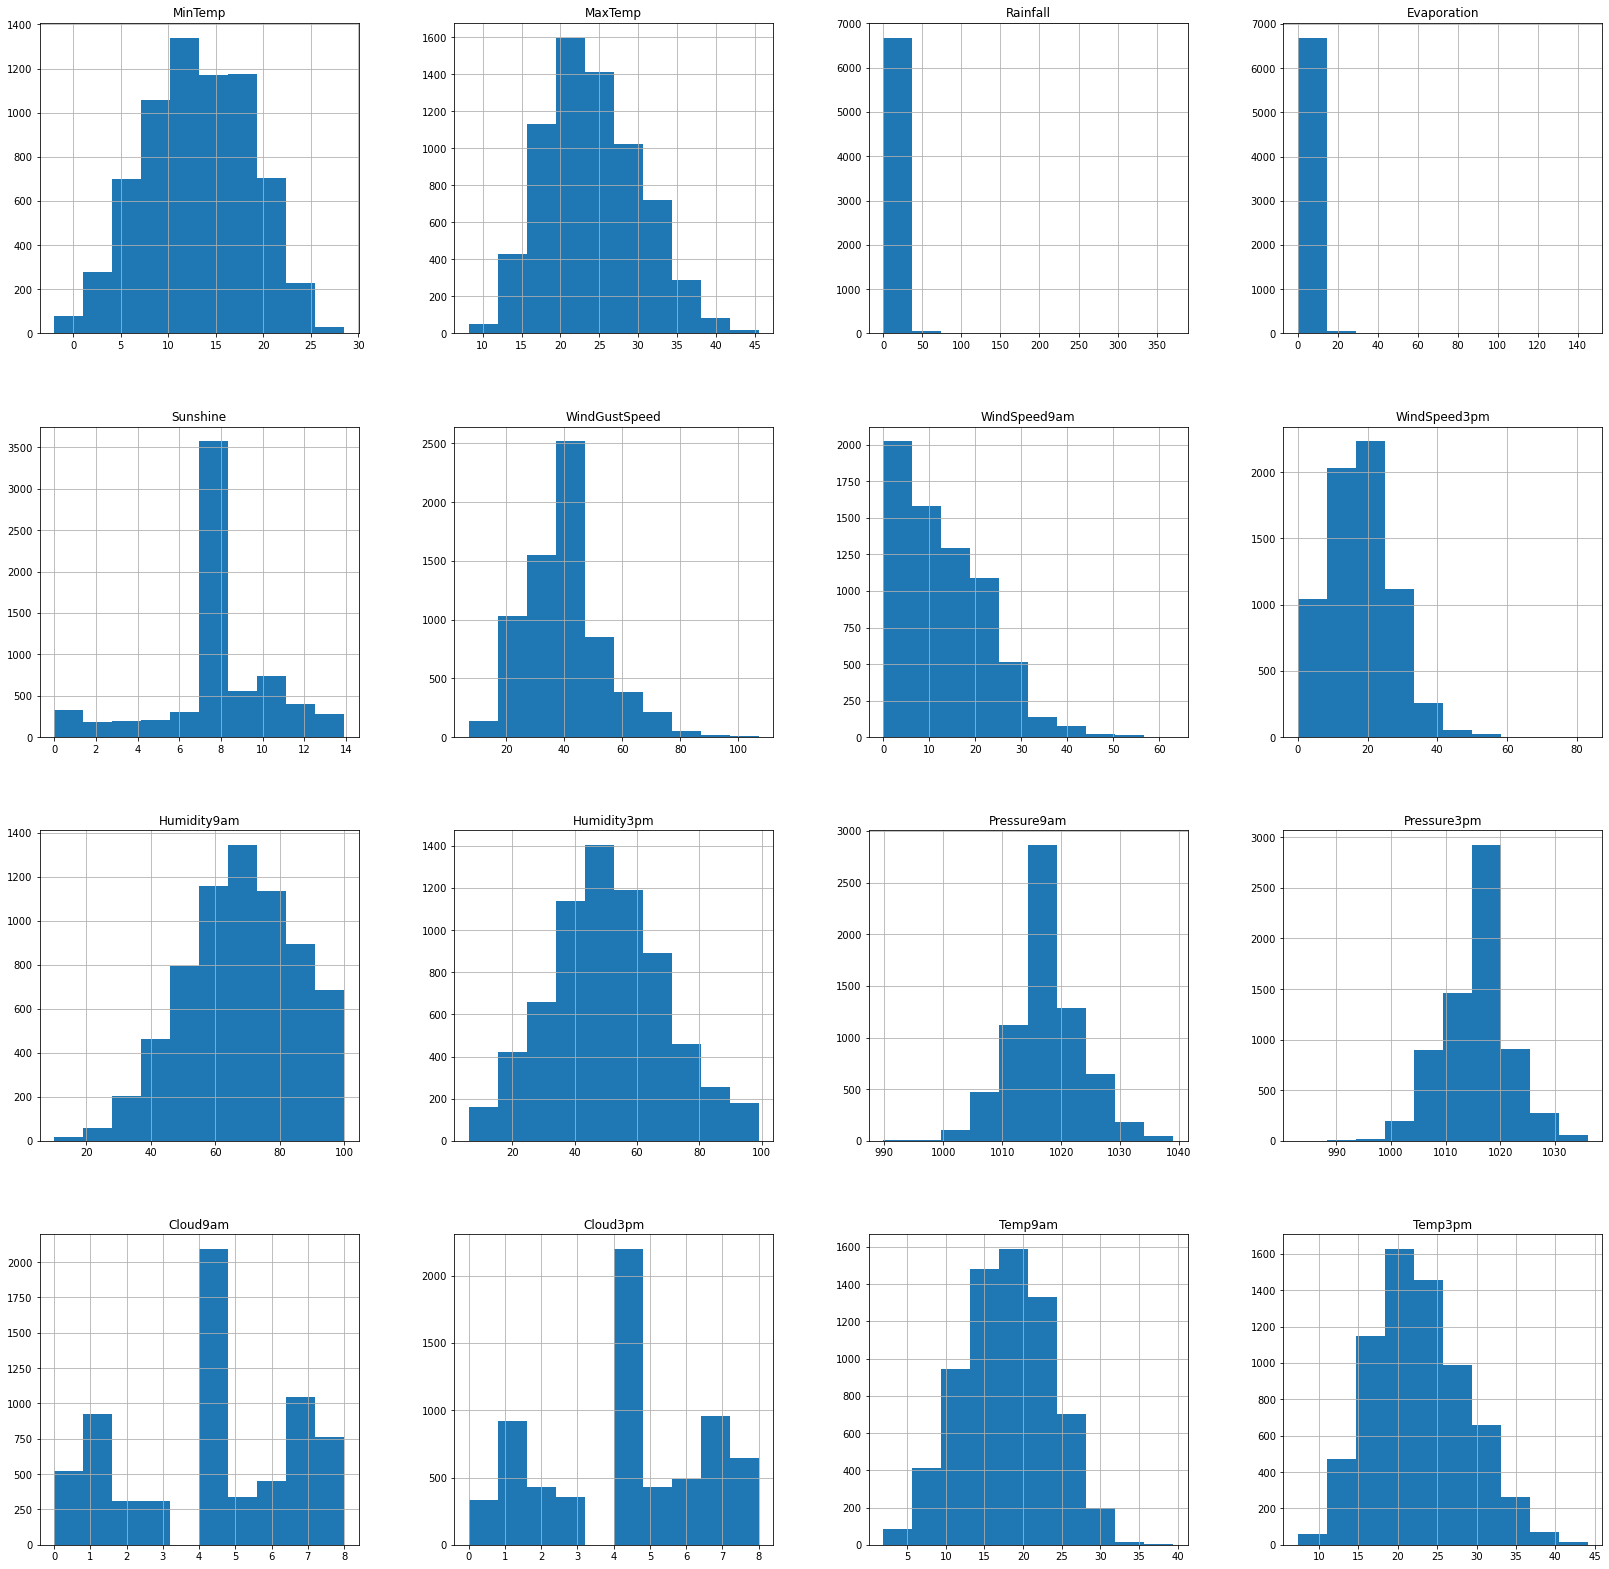

In [13]:
df.hist(figsize=(28,28));

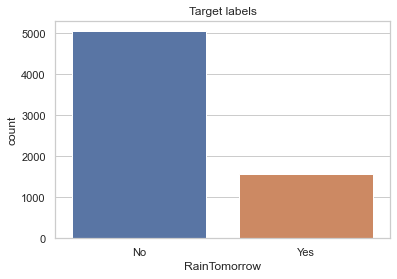

In [14]:
sns.set(style="whitegrid")
sns.countplot(df.RainTomorrow)
plt.title("Target labels")
plt.show()

From above plot it is clear that data set is imbalanced

# Separating the df based on its class label.

In [15]:
df.isnull().any()

Date             False
Location         False
MinTemp          False
MaxTemp          False
Rainfall         False
Evaporation      False
Sunshine         False
WindGustDir       True
WindGustSpeed    False
WindDir9am        True
WindDir3pm        True
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Cloud9am         False
Cloud3pm         False
Temp9am          False
Temp3pm          False
RainToday         True
RainTomorrow      True
dtype: bool

In [16]:
## Checking Nulls 
df.isnull().sum()

Date               0
Location           0
MinTemp            0
MaxTemp            0
Rainfall           0
Evaporation        0
Sunshine           0
WindGustDir      942
WindGustSpeed      0
WindDir9am       794
WindDir3pm       294
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Cloud9am           0
Cloud3pm           0
Temp9am            0
Temp3pm            0
RainToday        138
RainTomorrow     138
dtype: int64

In [17]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]

<AxesSubplot:>

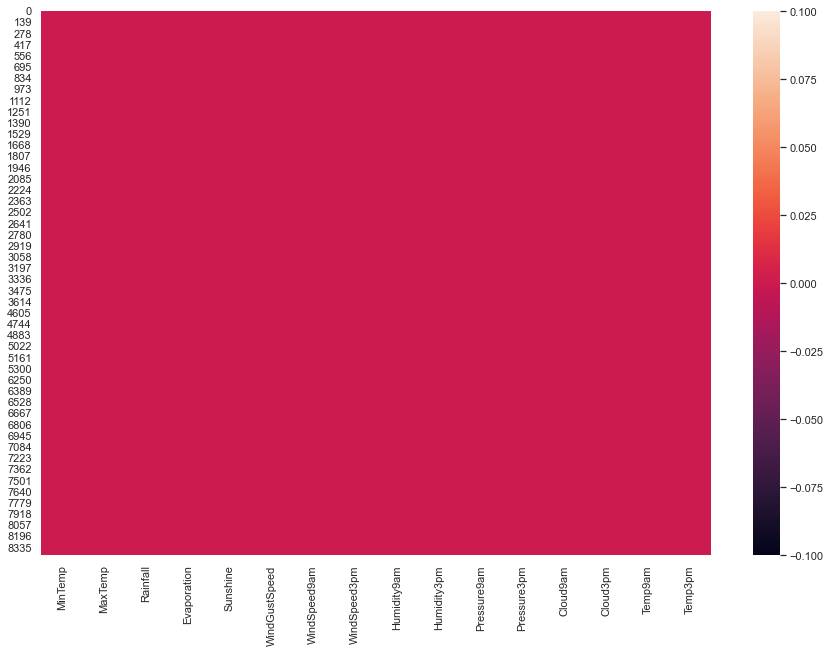

In [18]:
plt.figure(figsize=(15,10))
sns.heatmap(df[numerical_feature].isnull(),linecolor='white')

In [19]:
print(numerical_feature)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [20]:
print(discrete_feature)

['Cloud9am', 'Cloud3pm']


In [21]:
print(continuous_feature)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']


In [22]:
print(categorical_feature)

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


# visualizing the Null values in Numerical Features:

<AxesSubplot:>

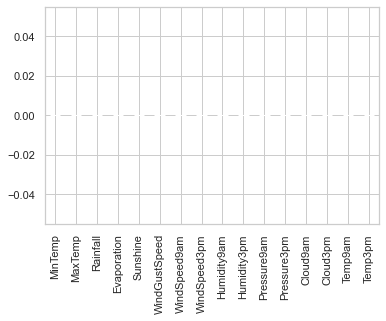

In [23]:
df[numerical_feature].isnull().sum().sort_values(ascending = False).plot(kind = 'bar')

# checking for outliers using Box Plot:

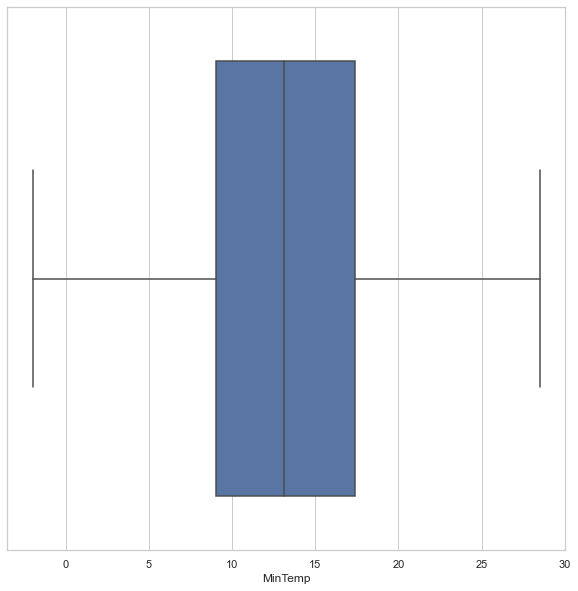

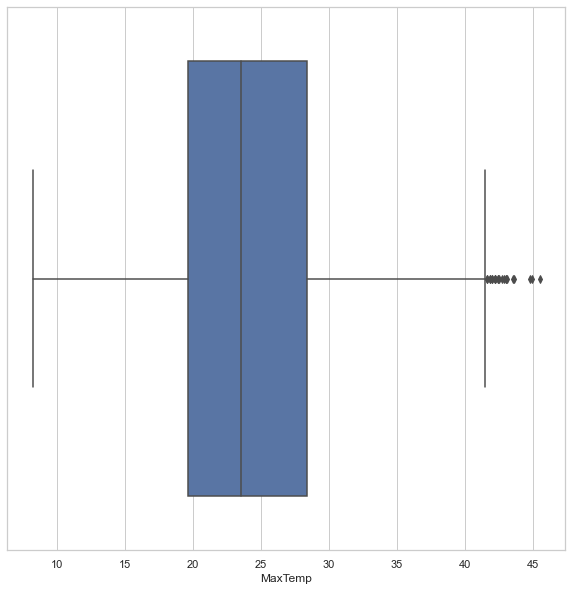

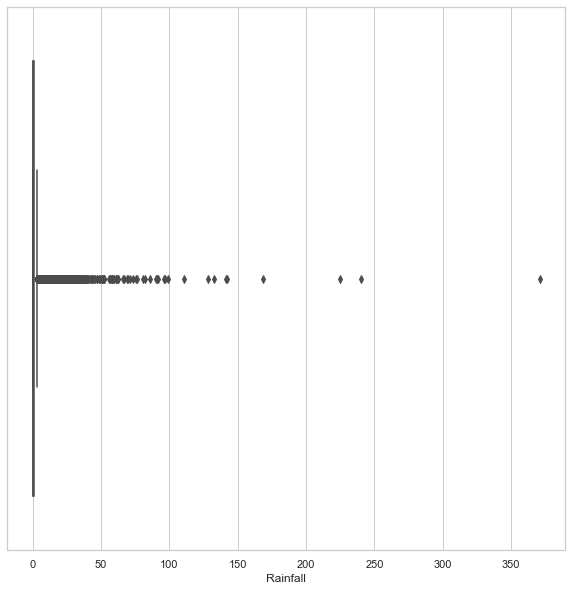

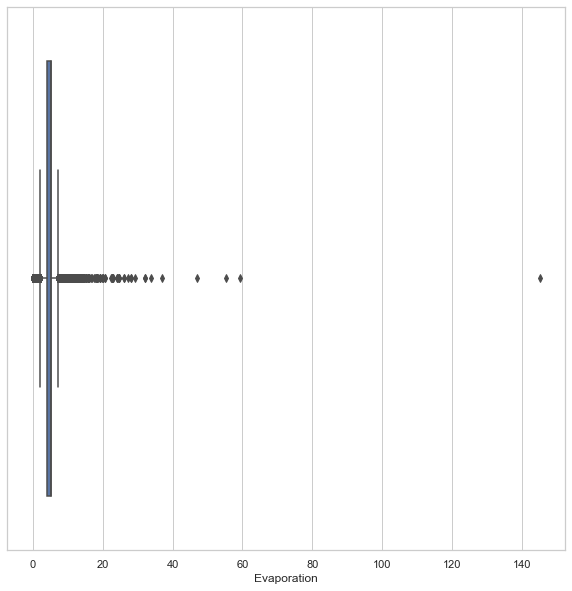

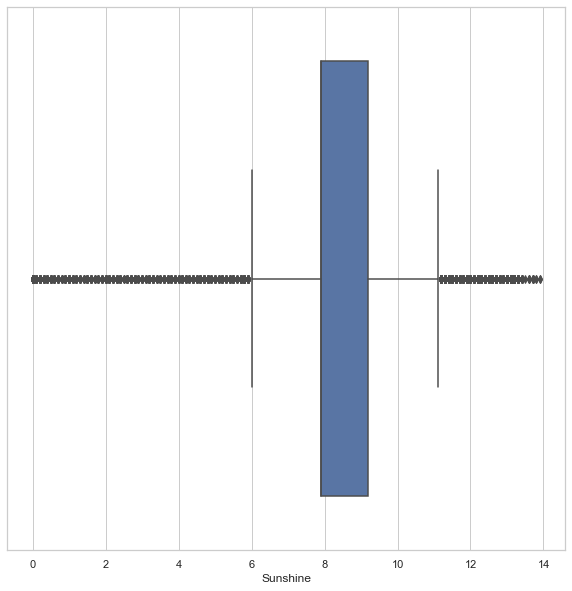

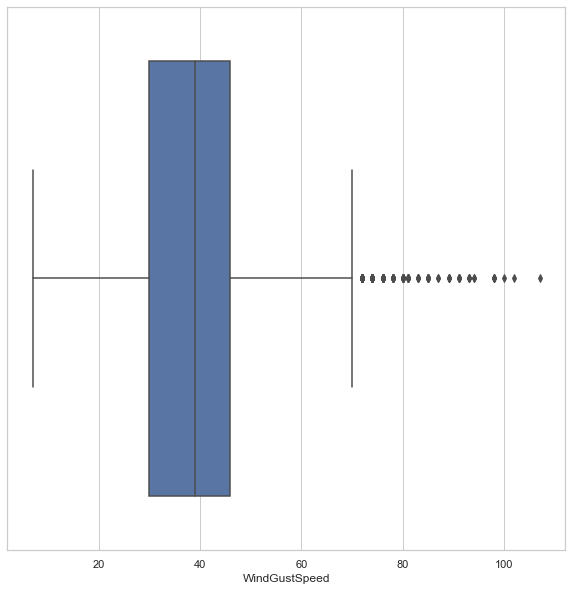

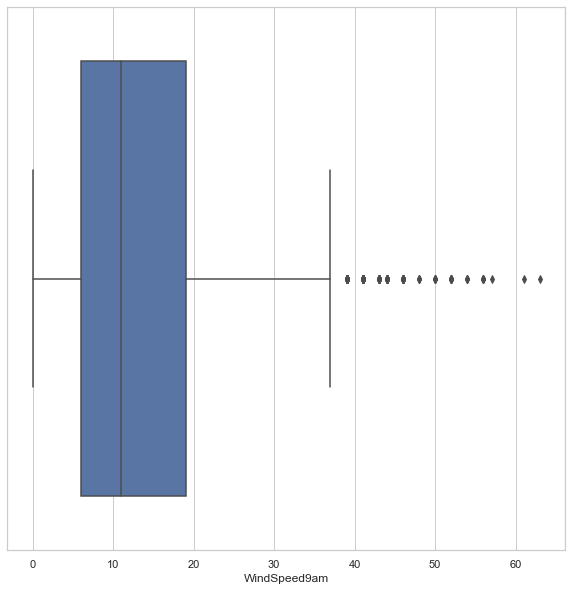

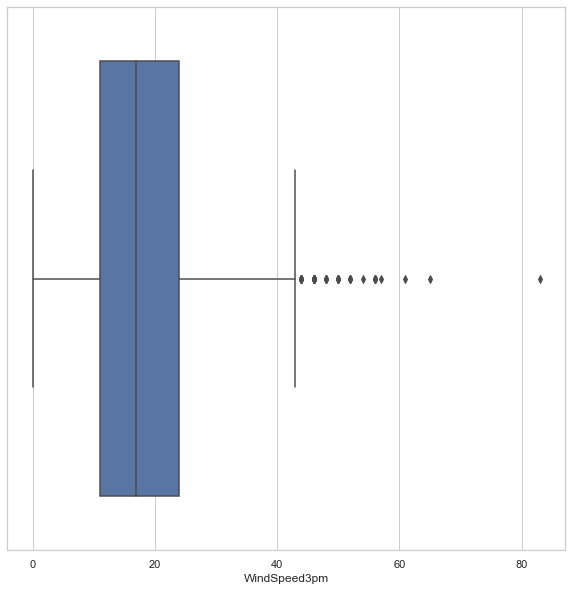

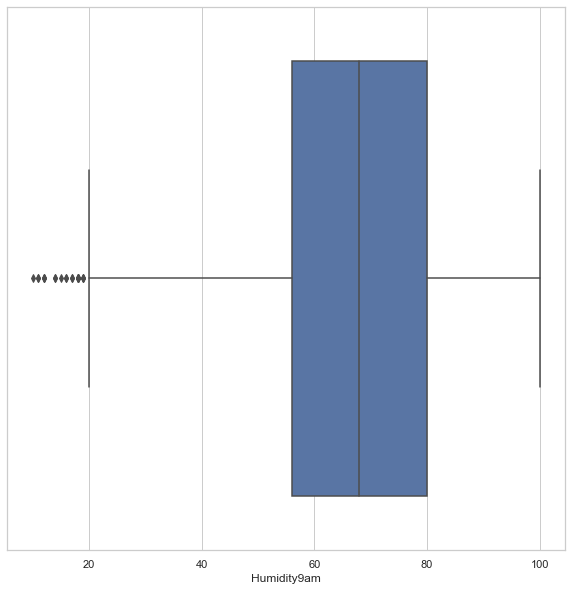

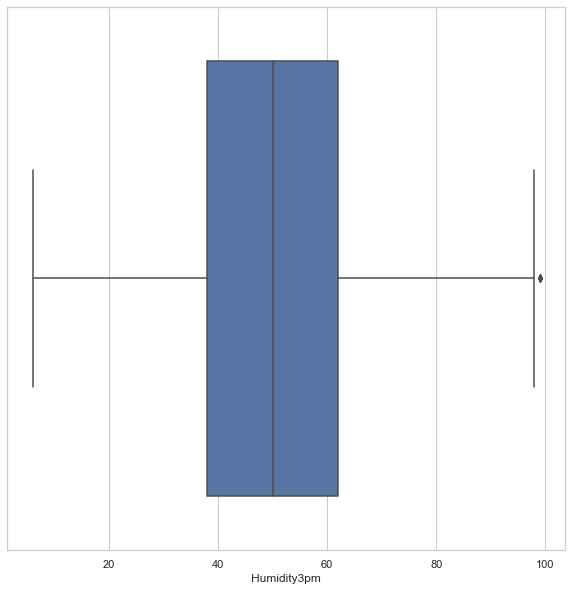

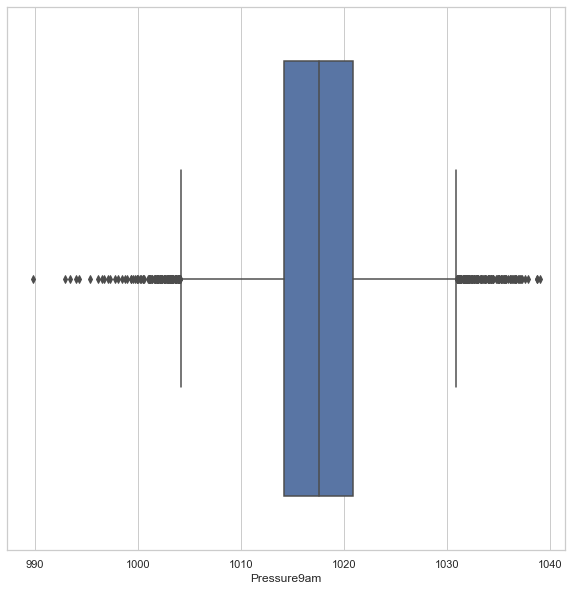

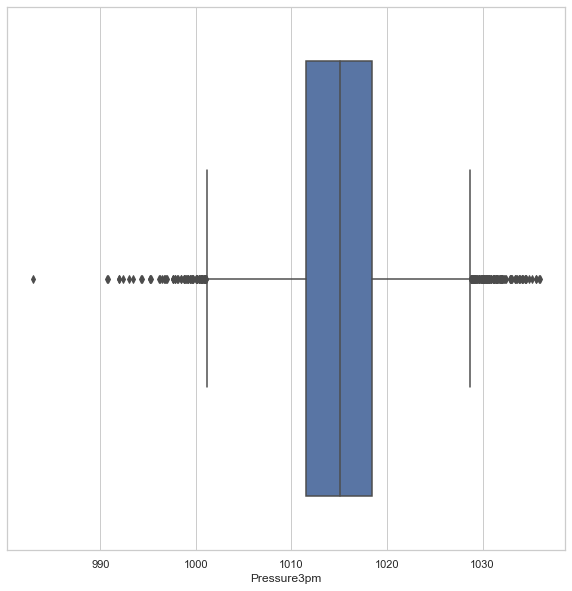

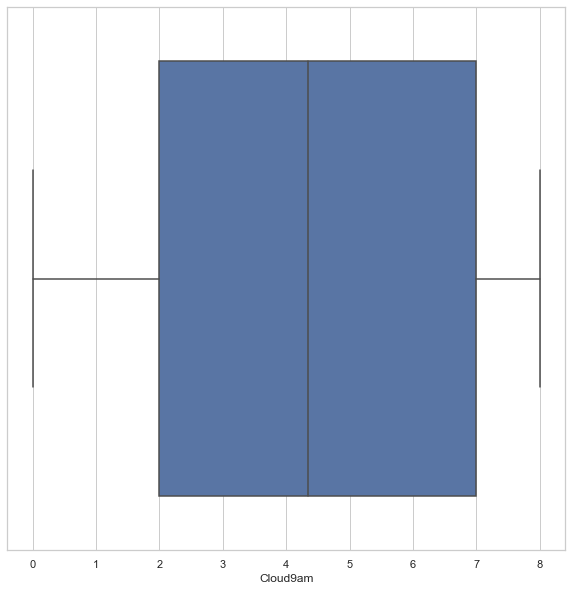

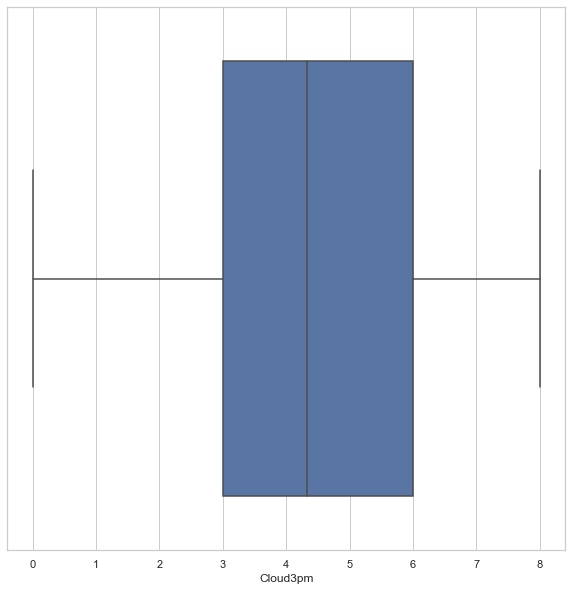

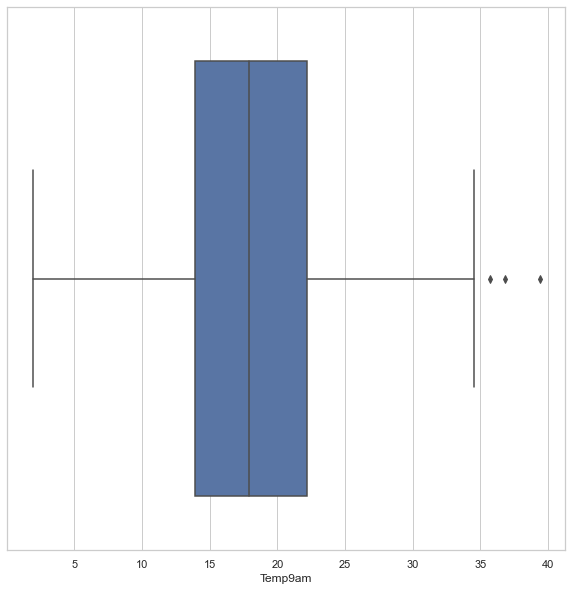

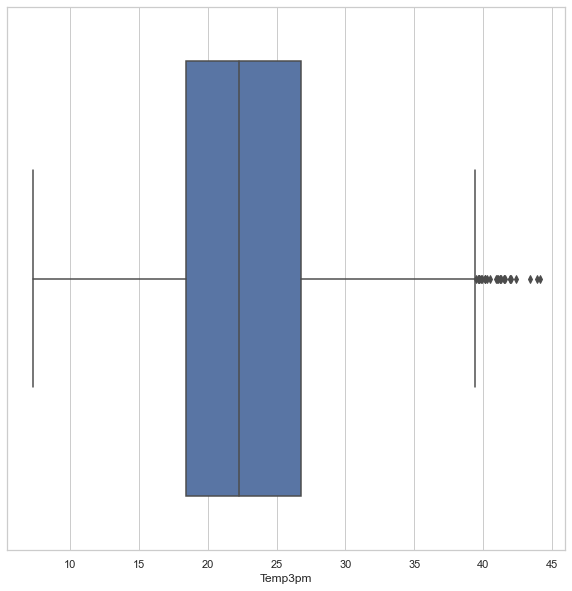

In [24]:
for feature in numerical_feature:
    plt.figure(figsize=(10,10))
    sns.boxplot(df[feature])
    plt.show()
    

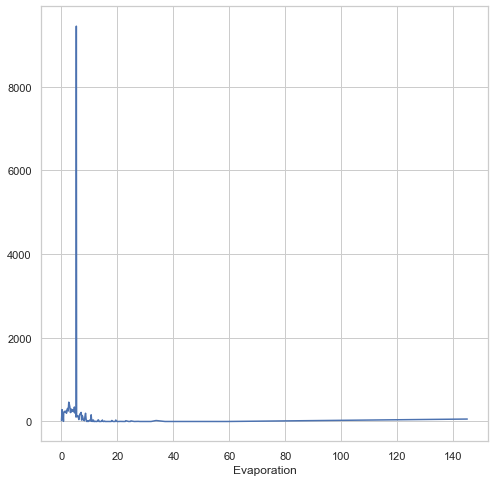

In [25]:
df.groupby("Evaporation").sum()['Rainfall'].plot(figsize=(8,8));

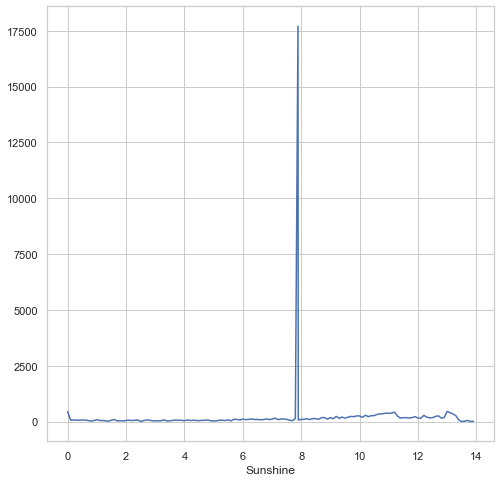

In [26]:
df.groupby("Sunshine").sum()['Evaporation'].plot(figsize=(8,8));

# features which has outliers:

In [27]:
features_with_outliers = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed','WindSpeed9am',
                          'WindSpeed3pm', 
    'Humidity9am', 'Pressure9am', 'Pressure3pm','Temp9am', 'Temp3pm']

In [28]:
print('Shape of DataFrame before Removing Outliers', df.shape )

Shape of DataFrame before Removing Outliers (6762, 23)


# Replacing outliers using IQR:

In [29]:
for feature in features_with_outliers:
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    df.loc[df[feature]<lower_limit,feature] = lower_limit
    df.loc[df[feature]>upper_limit,feature] = upper_limit

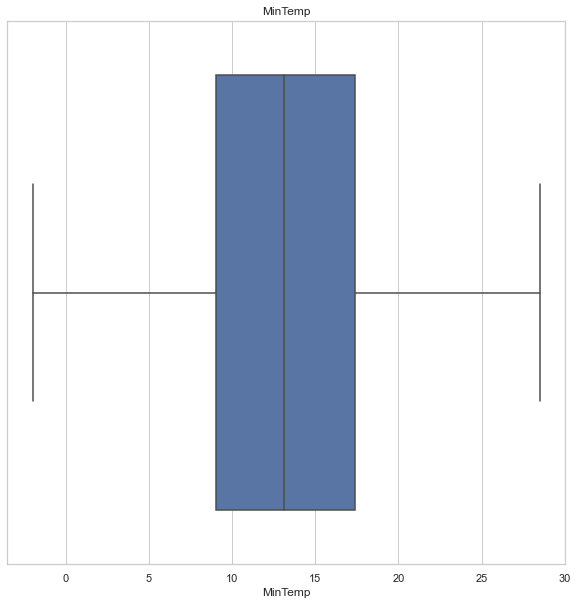

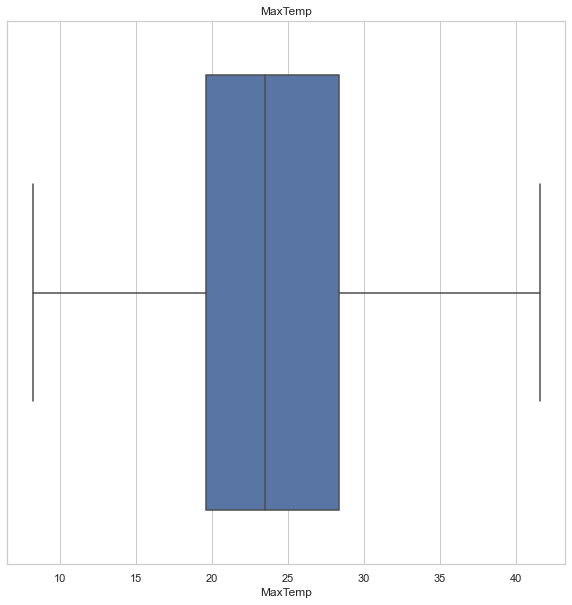

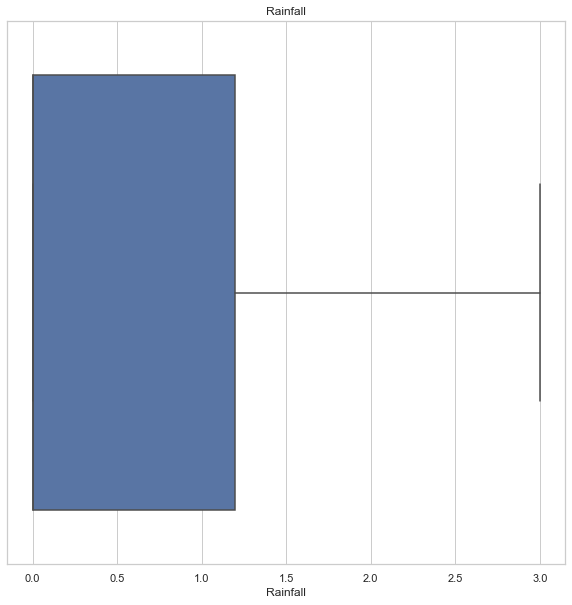

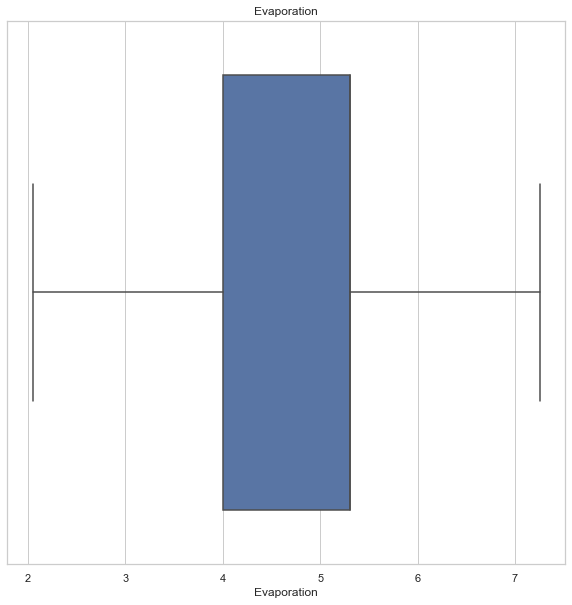

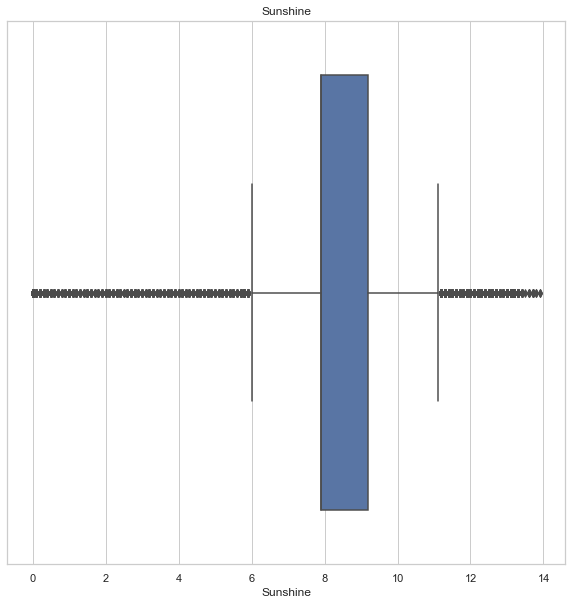

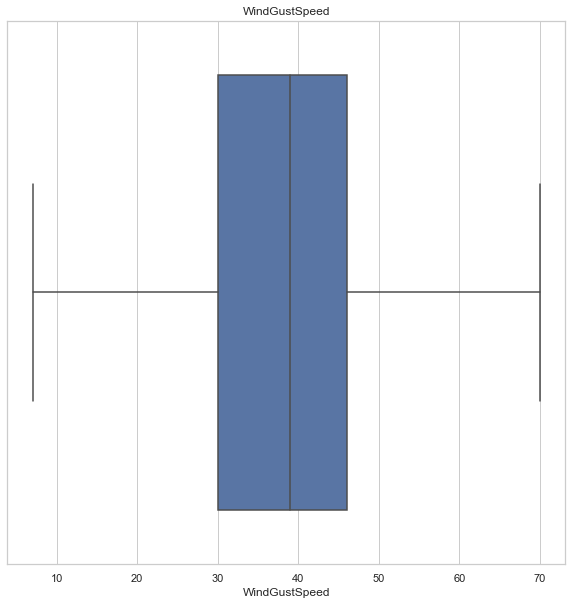

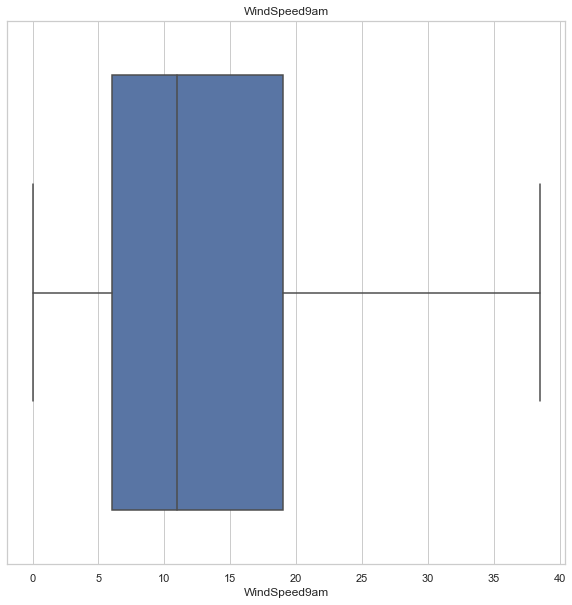

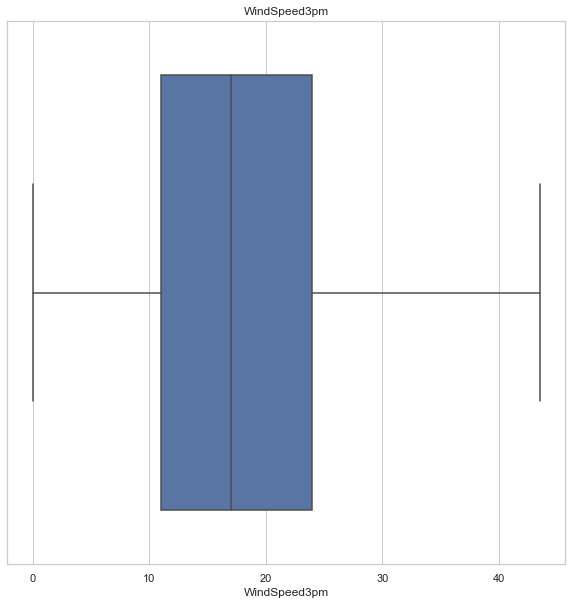

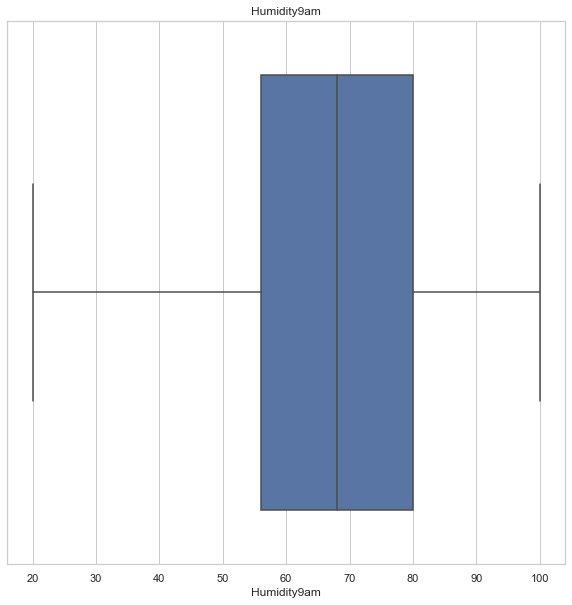

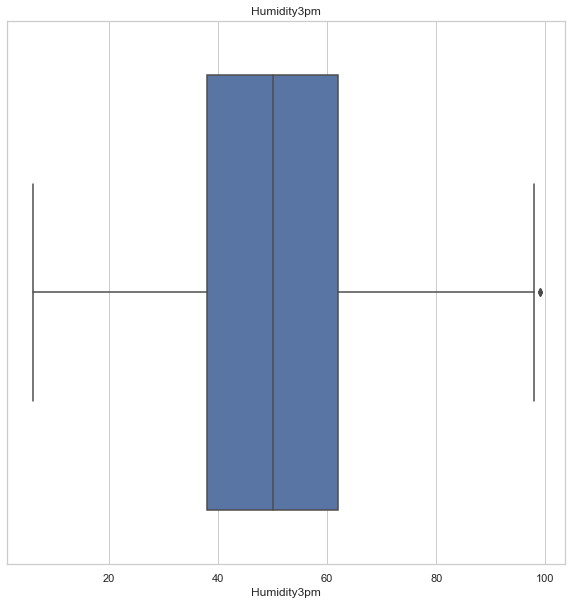

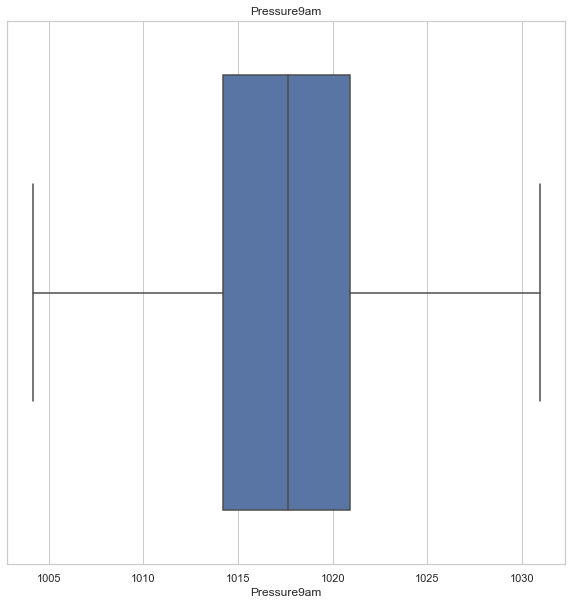

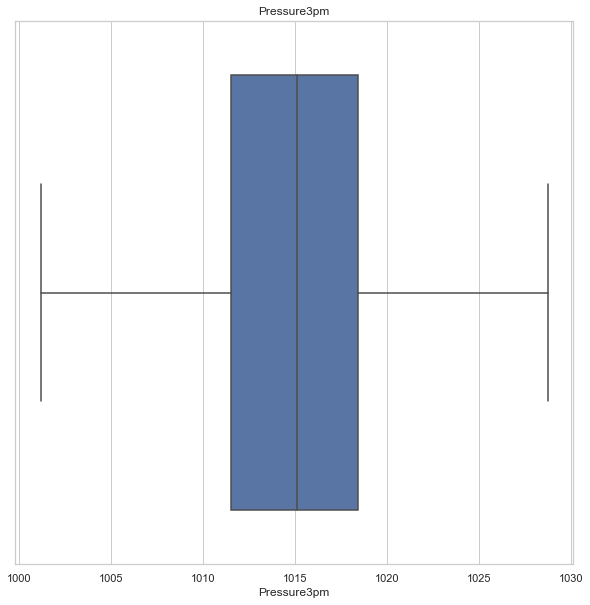

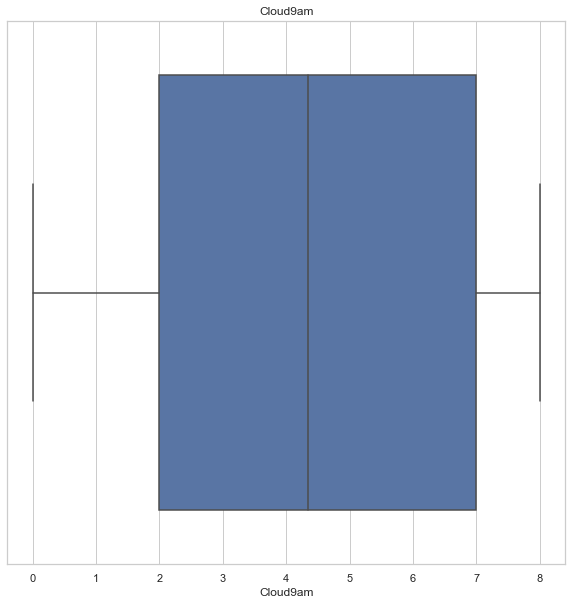

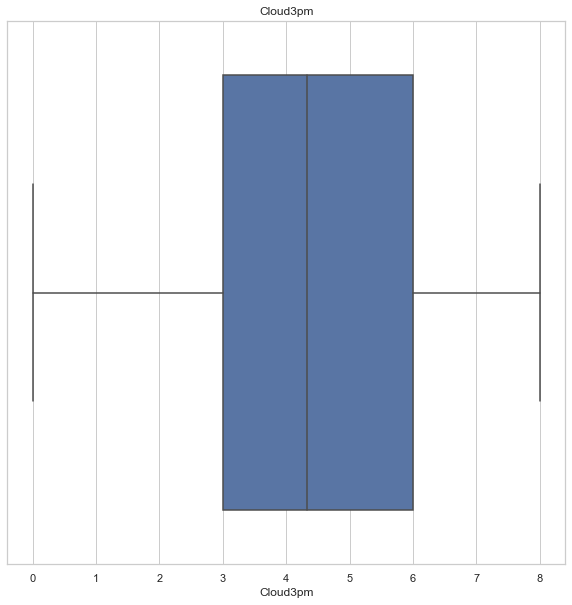

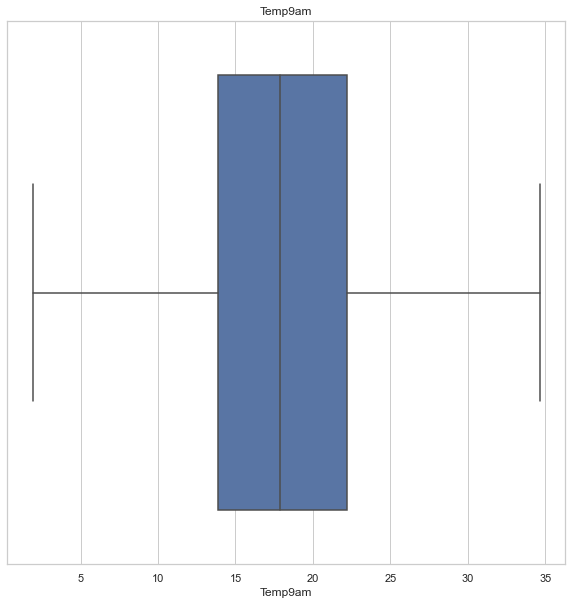

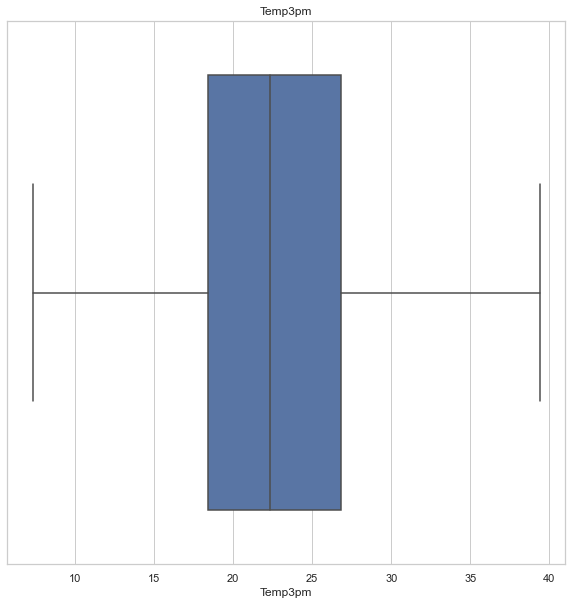

In [30]:
for feature in numerical_feature:
    plt.figure(figsize=(10,10))
    sns.boxplot(df[feature])
    plt.title(feature)

# Univariate Analysis`

<AxesSubplot:>

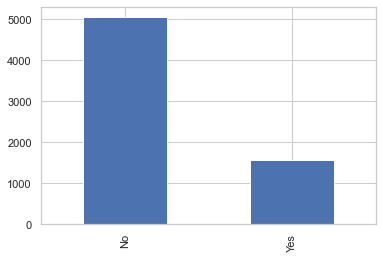

In [31]:
df['RainTomorrow'].value_counts().plot(kind='bar')

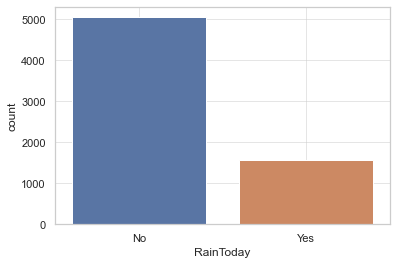

In [32]:
sns.countplot(data=df, x="RainToday")
plt.grid(linewidth = 0.5)
plt.show()

# Multivariate Analysis

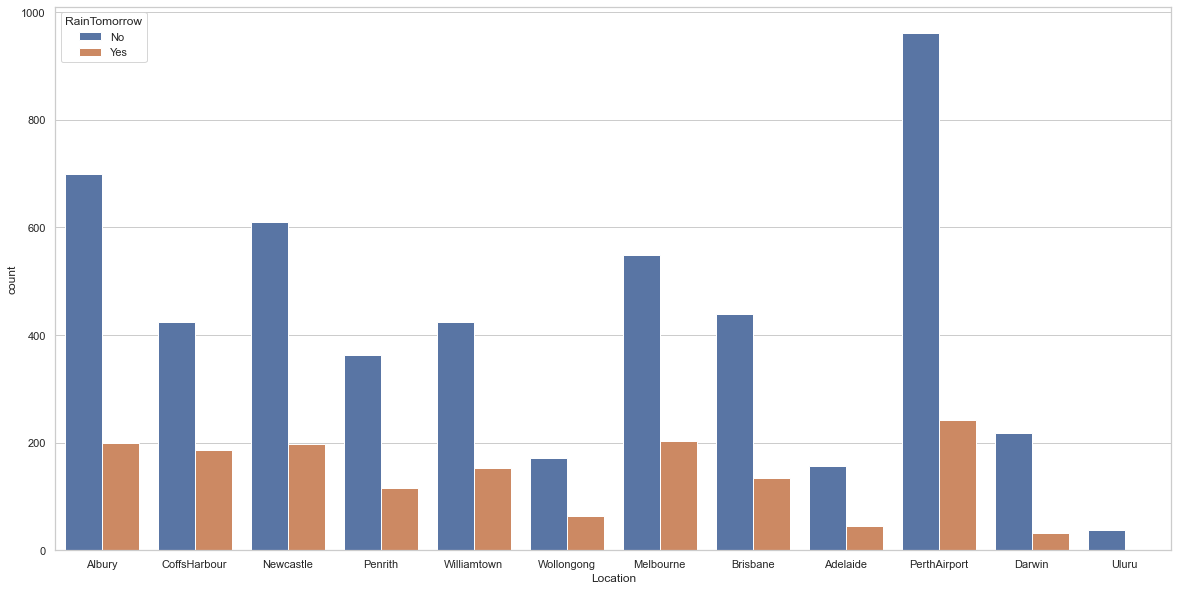

In [33]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x="Location", hue="RainTomorrow", data=df)

<AxesSubplot:xlabel='Sunshine', ylabel='Rainfall'>

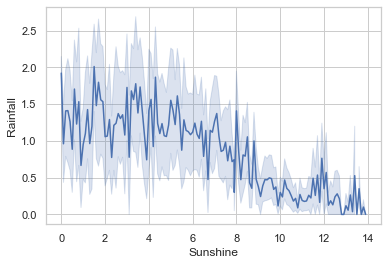

In [34]:
sns.lineplot(data=df,x='Sunshine',y='Rainfall')

array([[<AxesSubplot:title={'center':'MinTemp'}>,
        <AxesSubplot:title={'center':'MaxTemp'}>,
        <AxesSubplot:title={'center':'Rainfall'}>,
        <AxesSubplot:title={'center':'Evaporation'}>],
       [<AxesSubplot:title={'center':'Sunshine'}>,
        <AxesSubplot:title={'center':'WindGustSpeed'}>,
        <AxesSubplot:title={'center':'WindSpeed9am'}>,
        <AxesSubplot:title={'center':'WindSpeed3pm'}>],
       [<AxesSubplot:title={'center':'Humidity9am'}>,
        <AxesSubplot:title={'center':'Humidity3pm'}>,
        <AxesSubplot:title={'center':'Pressure9am'}>,
        <AxesSubplot:title={'center':'Pressure3pm'}>],
       [<AxesSubplot:title={'center':'Cloud9am'}>,
        <AxesSubplot:title={'center':'Cloud3pm'}>,
        <AxesSubplot:title={'center':'Temp9am'}>,
        <AxesSubplot:title={'center':'Temp3pm'}>]], dtype=object)

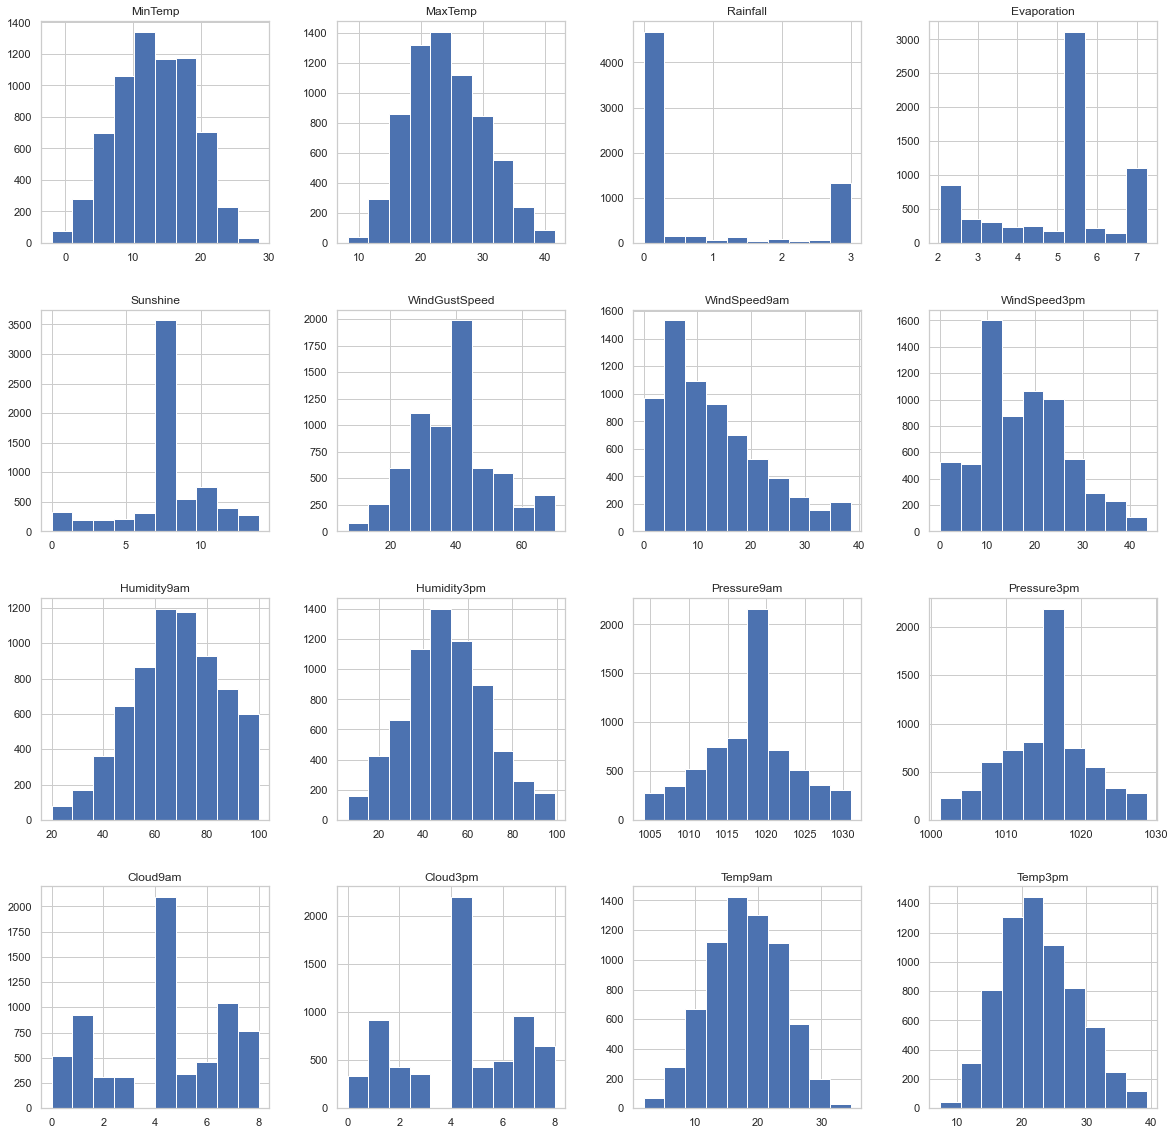

In [35]:
num_features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
df[num_features].hist(bins=10,figsize=(20,20))

In [36]:
df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.728414,0.093093,0.361897,0.039286,0.249925,0.173023,0.191646,-0.153820,0.067683,-0.447876,-0.446199,0.095403,0.047495,0.891483,0.697024
MaxTemp,0.728414,1.000000,-0.224692,0.452042,0.356156,0.170720,0.057111,0.118266,-0.424396,-0.430204,-0.345962,-0.420841,-0.245378,-0.241810,0.867038,0.974675
Rainfall,0.093093,-0.224692,1.000000,-0.171926,-0.278786,0.104911,0.050505,0.035474,0.404503,0.388797,-0.126617,-0.050590,0.318009,0.269373,-0.086919,-0.235937
Evaporation,0.361897,0.452042,-0.171926,1.000000,0.377934,0.170554,0.088022,0.092525,-0.279311,-0.218624,-0.278489,-0.293536,-0.083909,-0.137123,0.409709,0.442555
Sunshine,0.039286,0.356156,-0.278786,0.377934,1.000000,0.015509,0.011181,0.050766,-0.379067,-0.445111,-0.007246,-0.062763,-0.542442,-0.562537,0.236044,0.375210
WindGustSpeed,0.249925,0.170720,0.104911,0.170554,0.015509,1.000000,0.595011,0.629686,-0.275189,-0.098455,-0.388527,-0.356163,0.009794,0.055282,0.228769,0.135746
WindSpeed9am,0.173023,0.057111,0.050505,0.088022,0.011181,0.595011,1.000000,0.555192,-0.376781,-0.120583,-0.176942,-0.144542,-0.026345,0.018803,0.154896,0.042177
WindSpeed3pm,0.191646,0.118266,0.035474,0.092525,0.050766,0.629686,0.555192,1.000000,-0.261861,-0.099990,-0.247478,-0.206282,-0.012314,-0.020173,0.211321,0.095314
Humidity9am,-0.153820,-0.424396,0.404503,-0.279311,-0.379067,-0.275189,-0.376781,-0.261861,1.000000,0.639581,0.140636,0.178045,0.421366,0.320852,-0.406527,-0.417663
Humidity3pm,0.067683,-0.430204,0.388797,-0.218624,-0.445111,-0.098455,-0.120583,-0.099990,0.639581,1.000000,-0.003218,0.065303,0.431851,0.458972,-0.136723,-0.499827


<AxesSubplot:>

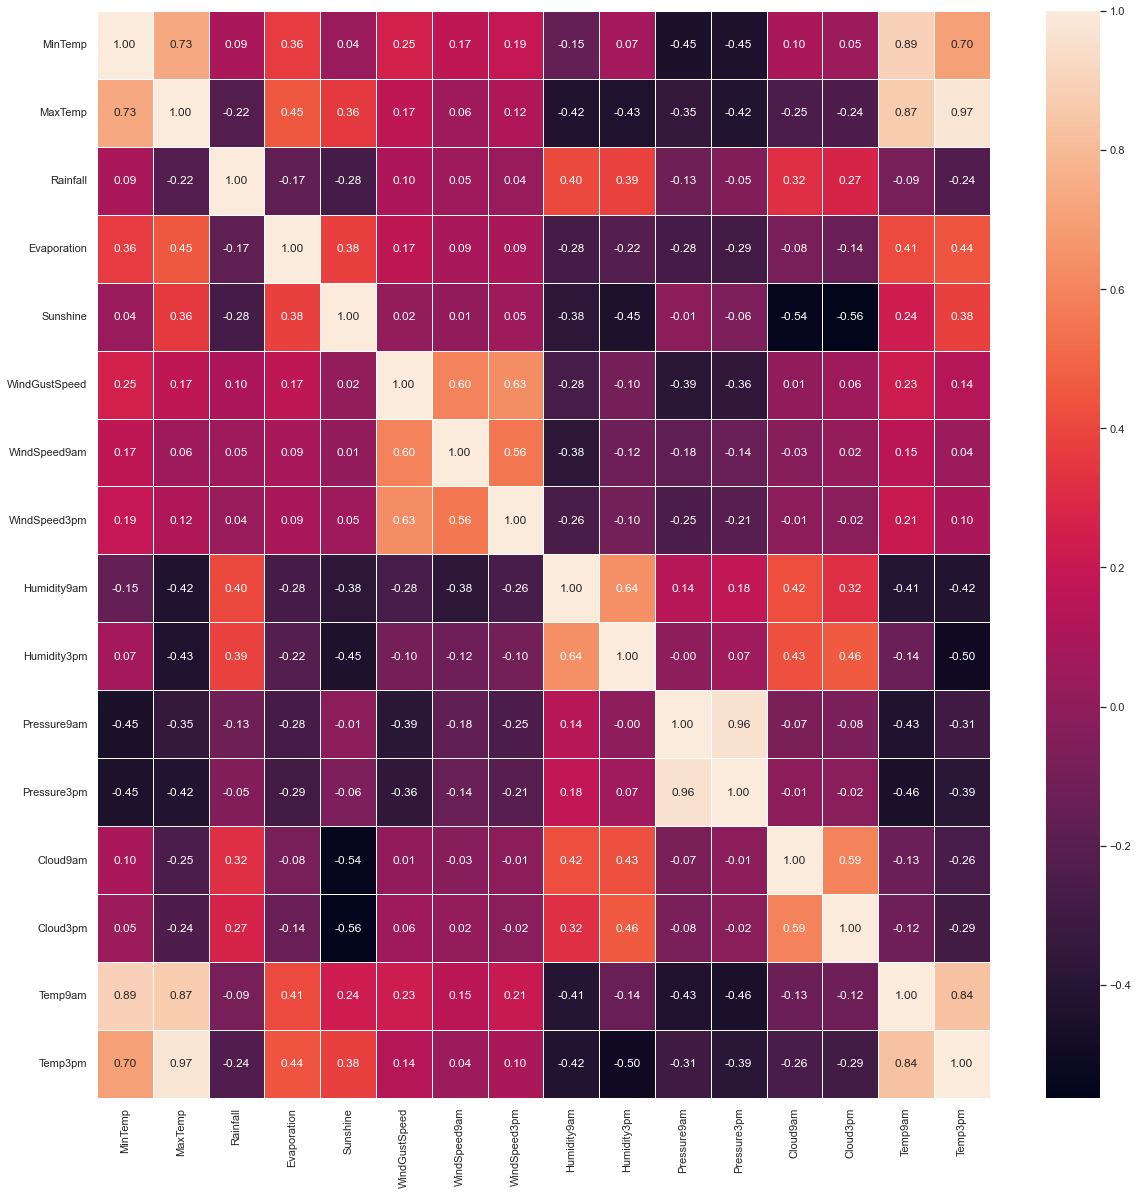

In [37]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),linewidths=0.5,annot=True,fmt=".2f")

In [38]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.302395,7.890896,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.320988,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,5.302395,7.890896,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,4.336806,4.320988,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,5.302395,7.890896,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,4.336806,2.000000,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,5.302395,7.890896,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,4.336806,4.320988,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.302395,7.890896,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No



# Encoding of Categorical Features`

In [39]:
# Encoding Categorical Features using replace function:

df['RainToday'].replace({'No':0, 'Yes': 1}, inplace = True)

df['RainTomorrow'].replace({'No':0, 'Yes': 1}, inplace = True)


In [40]:
le = preprocessing.LabelEncoder()
df['Location'] = le.fit_transform(df['Location'])
df['WindDir9am'] = le.fit_transform(df['WindDir9am'])
df['WindDir3pm'] = le.fit_transform(df['WindDir3pm'])
df['WindGustDir'] = le.fit_transform(df['WindGustDir'])

In [41]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,1,13.4,22.900000,0.6,5.302395,7.890896,13,44.000000,13,...,71.0,22.0,1007.7,1007.1,8.000000,4.320988,16.9,21.8,0.0,0.0
1,2008-12-02,1,7.4,25.100000,0.0,5.302395,7.890896,14,44.000000,6,...,44.0,25.0,1010.6,1007.8,4.336806,4.320988,17.2,24.3,0.0,0.0
2,2008-12-03,1,12.9,25.700000,0.0,5.302395,7.890896,15,46.000000,13,...,38.0,30.0,1007.6,1008.7,4.336806,2.000000,21.0,23.2,0.0,0.0
3,2008-12-04,1,9.2,28.000000,0.0,5.302395,7.890896,4,24.000000,9,...,45.0,16.0,1017.6,1012.8,4.336806,4.320988,18.1,26.5,0.0,0.0
4,2008-12-05,1,17.5,32.300000,1.0,5.302395,7.890896,13,41.000000,1,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,9,2.8,23.400000,0.0,5.302395,7.890896,0,31.000000,9,...,51.0,24.0,1024.6,1020.3,4.336806,4.320988,10.1,22.4,0.0,0.0
8421,2017-06-22,9,3.6,25.300000,0.0,5.302395,7.890896,6,22.000000,9,...,56.0,21.0,1023.5,1019.1,4.336806,4.320988,10.9,24.5,0.0,0.0
8422,2017-06-23,9,5.4,26.900000,0.0,5.302395,7.890896,3,37.000000,9,...,53.0,24.0,1021.0,1016.8,4.336806,4.320988,12.5,26.1,0.0,0.0
8423,2017-06-24,9,7.8,27.000000,0.0,5.302395,7.890896,9,28.000000,10,...,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,0.0,0.0


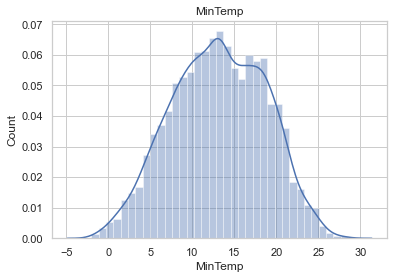

<Figure size 1080x1080 with 0 Axes>

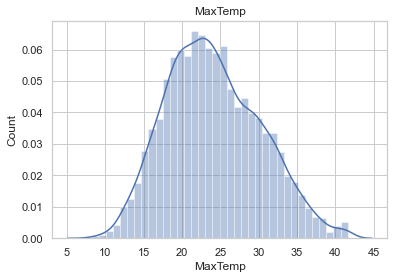

<Figure size 1080x1080 with 0 Axes>

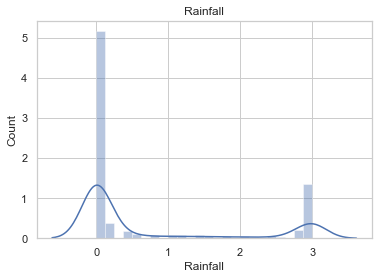

<Figure size 1080x1080 with 0 Axes>

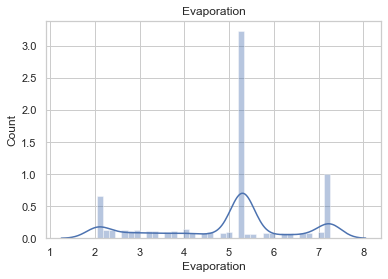

<Figure size 1080x1080 with 0 Axes>

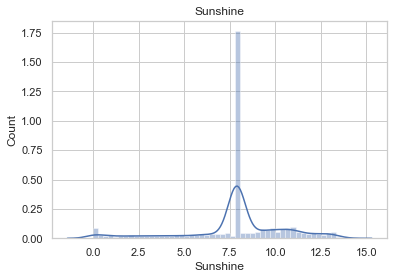

<Figure size 1080x1080 with 0 Axes>

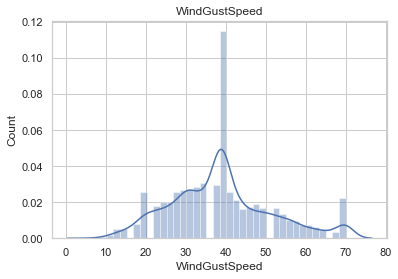

<Figure size 1080x1080 with 0 Axes>

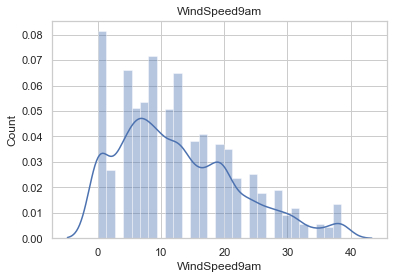

<Figure size 1080x1080 with 0 Axes>

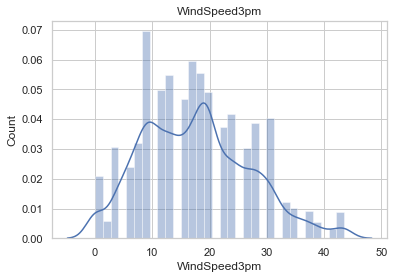

<Figure size 1080x1080 with 0 Axes>

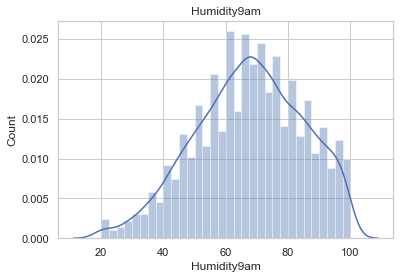

<Figure size 1080x1080 with 0 Axes>

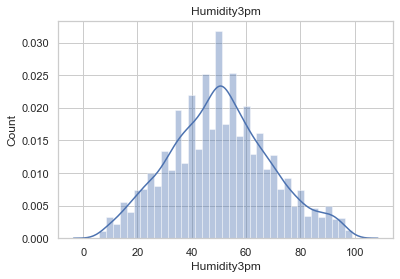

<Figure size 1080x1080 with 0 Axes>

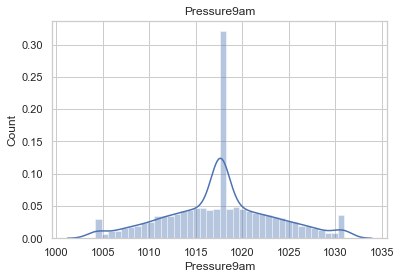

<Figure size 1080x1080 with 0 Axes>

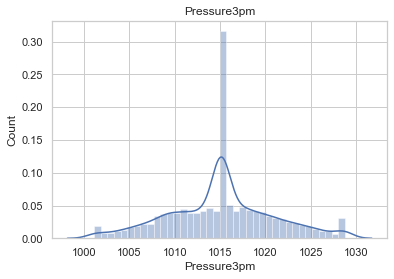

<Figure size 1080x1080 with 0 Axes>

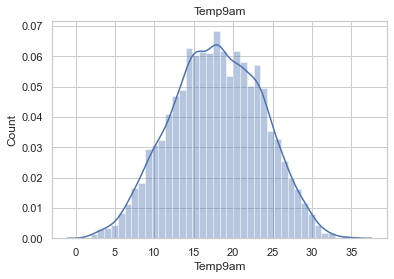

<Figure size 1080x1080 with 0 Axes>

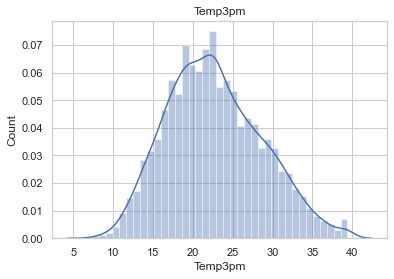

<Figure size 1080x1080 with 0 Axes>

In [42]:
for feature in continuous_feature:
    data=df.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

In [43]:
discrete_feature

['Cloud9am', 'Cloud3pm']

In [44]:
def mode_nan(df,variable):
    mode=df[variable].value_counts().index[0]
    df[variable].fillna(mode,inplace=True)
mode_nan(df,"Cloud9am")
mode_nan(df,"Cloud3pm")

In [45]:
df["RainToday"] = pd.get_dummies(df["RainToday"], drop_first = True)
df["RainTomorrow"] = pd.get_dummies(df["RainTomorrow"], drop_first = True)
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,1,13.4,22.900000,0.6,5.302395,7.890896,13,44.000000,13,...,71.0,22.0,1007.7,1007.1,8.000000,4.320988,16.9,21.8,0,0
1,2008-12-02,1,7.4,25.100000,0.0,5.302395,7.890896,14,44.000000,6,...,44.0,25.0,1010.6,1007.8,4.336806,4.320988,17.2,24.3,0,0
2,2008-12-03,1,12.9,25.700000,0.0,5.302395,7.890896,15,46.000000,13,...,38.0,30.0,1007.6,1008.7,4.336806,2.000000,21.0,23.2,0,0
3,2008-12-04,1,9.2,28.000000,0.0,5.302395,7.890896,4,24.000000,9,...,45.0,16.0,1017.6,1012.8,4.336806,4.320988,18.1,26.5,0,0
4,2008-12-05,1,17.5,32.300000,1.0,5.302395,7.890896,13,41.000000,1,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,9,2.8,23.400000,0.0,5.302395,7.890896,0,31.000000,9,...,51.0,24.0,1024.6,1020.3,4.336806,4.320988,10.1,22.4,0,0
8421,2017-06-22,9,3.6,25.300000,0.0,5.302395,7.890896,6,22.000000,9,...,56.0,21.0,1023.5,1019.1,4.336806,4.320988,10.9,24.5,0,0
8422,2017-06-23,9,5.4,26.900000,0.0,5.302395,7.890896,3,37.000000,9,...,53.0,24.0,1021.0,1016.8,4.336806,4.320988,12.5,26.1,0,0
8423,2017-06-24,9,7.8,27.000000,0.0,5.302395,7.890896,9,28.000000,10,...,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,0,0


In [46]:
for feature in categorical_feature:
    print(feature, (df.groupby([feature])["RainTomorrow"].mean().sort_values(ascending = False)).index)

Date Index(['2016-04-30', '2017-03-04', '2015-11-03', '2017-02-27', '2017-02-28',
       '2017-03-01', '2017-03-02', '2017-03-03', '2013-04-12', '2015-04-29',
       ...
       '2013-01-11', '2013-01-10', '2013-01-09', '2013-01-08', '2013-01-07',
       '2013-01-05', '2013-01-04', '2013-01-03', '2013-01-02', '2017-06-25'],
      dtype='object', name='Date', length=3004)
Location Int64Index([3, 11, 5, 10, 6, 7, 2, 0, 1, 8, 4, 9], dtype='int64', name='Location')
WindGustDir Int64Index([7, 6, 3, 14, 11, 8, 15, 12, 10, 5, 4, 16, 9, 2, 13, 1, 0], dtype='int64', name='WindGustDir')
WindDir9am Int64Index([3, 14, 12, 5, 6, 13, 11, 15, 2, 7, 16, 4, 8, 10, 9, 1, 0], dtype='int64', name='WindDir9am')
WindDir3pm Int64Index([6, 11, 16, 3, 7, 8, 14, 9, 5, 1, 15, 12, 10, 0, 4, 13, 2], dtype='int64', name='WindDir3pm')
RainToday UInt64Index([1, 0], dtype='uint64', name='RainToday')
RainTomorrow UInt64Index([1, 0], dtype='uint64', name='RainTomorrow')


In [47]:
df.isnull().sum()*100/len(df)

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

In [48]:
df.skew()

Location        -0.000009
MinTemp         -0.083706
MaxTemp          0.313680
Rainfall         1.223422
Evaporation     -0.440138
Sunshine        -0.882147
WindGustDir     -0.207548
WindGustSpeed    0.462787
WindDir9am      -0.067308
WindDir3pm      -0.078188
WindSpeed9am     0.715200
WindSpeed3pm     0.389355
Humidity9am     -0.238373
Humidity3pm      0.150860
Pressure9am      0.024813
Pressure3pm      0.043102
Cloud9am        -0.215085
Cloud3pm        -0.162159
Temp9am         -0.053205
Temp3pm          0.323141
RainToday        1.266937
RainTomorrow     1.266937
dtype: float64

In [49]:
df["Date"] = pd.to_datetime(df["Date"], format = "%Y-%m-%dT", errors = "coerce")

In [50]:
df["Date_month"] = df["Date"].dt.month
df["Date_day"] = df["Date"].dt.day
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_month,Date_day
0,2008-12-01,1,13.4,22.900000,0.6,5.302395,7.890896,13,44.000000,13,...,1007.7,1007.1,8.000000,4.320988,16.9,21.8,0,0,12,1
1,2008-12-02,1,7.4,25.100000,0.0,5.302395,7.890896,14,44.000000,6,...,1010.6,1007.8,4.336806,4.320988,17.2,24.3,0,0,12,2
2,2008-12-03,1,12.9,25.700000,0.0,5.302395,7.890896,15,46.000000,13,...,1007.6,1008.7,4.336806,2.000000,21.0,23.2,0,0,12,3
3,2008-12-04,1,9.2,28.000000,0.0,5.302395,7.890896,4,24.000000,9,...,1017.6,1012.8,4.336806,4.320988,18.1,26.5,0,0,12,4
4,2008-12-05,1,17.5,32.300000,1.0,5.302395,7.890896,13,41.000000,1,...,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,9,2.8,23.400000,0.0,5.302395,7.890896,0,31.000000,9,...,1024.6,1020.3,4.336806,4.320988,10.1,22.4,0,0,6,21
8421,2017-06-22,9,3.6,25.300000,0.0,5.302395,7.890896,6,22.000000,9,...,1023.5,1019.1,4.336806,4.320988,10.9,24.5,0,0,6,22
8422,2017-06-23,9,5.4,26.900000,0.0,5.302395,7.890896,3,37.000000,9,...,1021.0,1016.8,4.336806,4.320988,12.5,26.1,0,0,6,23
8423,2017-06-24,9,7.8,27.000000,0.0,5.302395,7.890896,9,28.000000,10,...,1019.4,1016.5,3.000000,2.000000,15.1,26.0,0,0,6,24


In [51]:
X = df.drop(["RainTomorrow", "Date"],axis=1)
Y = df["RainTomorrow"]

# Multicollinearity

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["Features List"]=X.columns
vif["VIF Value"]=[variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
vif

,Features List,VIF Value
0,Location,4.518519
1,MinTemp,59.701322
2,MaxTemp,433.677632
3,Rainfall,8.466719
4,Evaporation,16.866506
5,Sunshine,18.876927
6,WindGustDir,6.060767
7,WindGustSpeed,22.528779
8,WindDir9am,5.341669
9,WindDir3pm,5.672186


In [53]:
df.skew()

Location        -0.000009
MinTemp         -0.083706
MaxTemp          0.313680
Rainfall         1.223422
Evaporation     -0.440138
Sunshine        -0.882147
WindGustDir     -0.207548
WindGustSpeed    0.462787
WindDir9am      -0.067308
WindDir3pm      -0.078188
WindSpeed9am     0.715200
WindSpeed3pm     0.389355
Humidity9am     -0.238373
Humidity3pm      0.150860
Pressure9am      0.024813
Pressure3pm      0.043102
Cloud9am        -0.215085
Cloud3pm        -0.162159
Temp9am         -0.053205
Temp3pm          0.323141
RainToday        1.266937
RainTomorrow     1.266937
Date_month       0.021988
Date_day         0.006240
dtype: float64

In [54]:
from sklearn.preprocessing import power_transform

df['RainTomorrow']=power_transform(df[['RainTomorrow']])
df['WindSpeed9am']=power_transform(df[['WindSpeed9am']])
df['Sunshine']=power_transform(df[['Sunshine']])
df['Rainfall']=power_transform(df[['Rainfall']])
df['RainToday']=power_transform(df[['RainToday']])


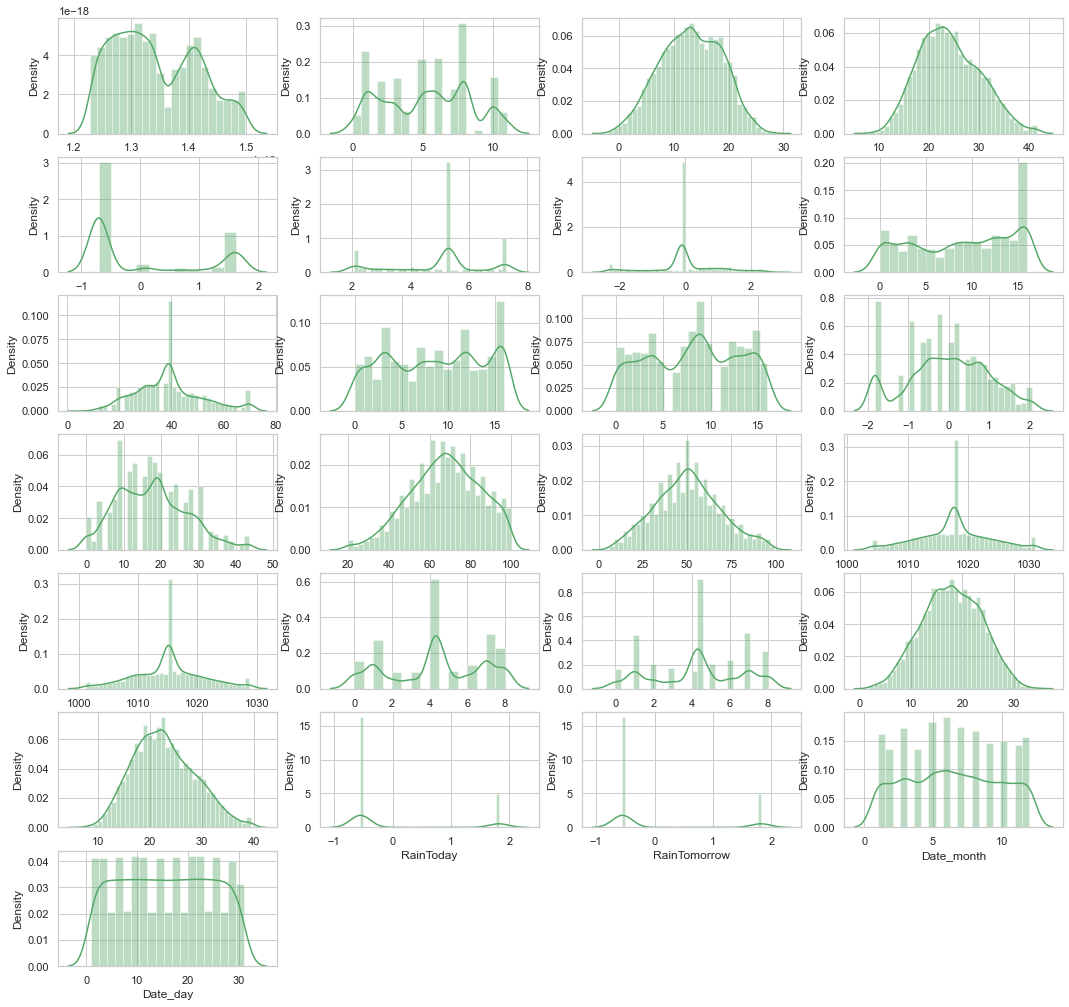

In [55]:
plt.figure(figsize=(18,20))
for i in enumerate(df):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]],color='g')

In [56]:
df.skew()

Location        -0.000009
MinTemp         -0.083706
MaxTemp          0.313680
Rainfall         0.837739
Evaporation     -0.440138
Sunshine        -0.071163
WindGustDir     -0.207548
WindGustSpeed    0.462787
WindDir9am      -0.067308
WindDir3pm      -0.078188
WindSpeed9am    -0.124303
WindSpeed3pm     0.389355
Humidity9am     -0.238373
Humidity3pm      0.150860
Pressure9am      0.024813
Pressure3pm      0.043102
Cloud9am        -0.215085
Cloud3pm        -0.162159
Temp9am         -0.053205
Temp3pm          0.323141
RainToday        1.266937
RainTomorrow     1.266937
Date_month       0.021988
Date_day         0.006240
dtype: float64

In [57]:
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
X=sc.fit_transform(X)

In [58]:
pd.DataFrame(X).describe()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
count,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,...,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000
mean,0.483975,0.495382,0.475881,0.242589,0.557902,0.567690,0.552462,0.504000,0.533736,0.509197,...,0.478141,0.502622,0.505759,0.542101,0.540123,0.488362,0.479801,0.232476,0.496558,0.491240
std,0.281769,0.181661,0.183181,0.397248,0.296958,0.196665,0.334352,0.201757,0.318513,0.298923,...,0.198907,0.215537,0.208557,0.309331,0.290410,0.174614,0.185385,0.422442,0.307043,0.293130
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.204545,0.360656,0.341317,0.000000,0.375000,0.567690,0.250000,0.365079,0.250000,0.250000,...,0.344086,0.375000,0.375000,0.250000,0.375000,0.366412,0.345794,0.000000,0.272727,0.233333
50%,0.545455,0.495382,0.458084,0.000000,0.625000,0.567690,0.562500,0.507582,0.562500,0.562500,...,0.473118,0.502847,0.506157,0.542101,0.540123,0.488550,0.467290,0.000000,0.454545,0.500000
75%,0.727273,0.636066,0.604790,0.400000,0.625000,0.661871,0.875000,0.619048,0.812500,0.750000,...,0.602151,0.625000,0.625000,0.875000,0.750000,0.619847,0.607477,0.000000,0.727273,0.733333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [60]:
from sklearn.linear_model import LinearRegression


LR=LinearRegression()

for i in range(0,100):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=i)
    LR.fit(X_train,Y_train)
    LR_predict_train=LR.predict(X_train)
    LR_predict_test=LR.predict(X_test)
    print(f'At random state {i}, The training accuracY is: {r2_score(Y_train,LR_predict_train)}')
    print(f'At random state {i}, The test accuracY is: {r2_score(Y_test,LR_predict_test)}')
    print('\n')

At random state 0, The training accuracY is: 0.34033466408217017
At random state 0, The test accuracY is: 0.3003691925662937


At random state 1, The training accuracY is: 0.33587497605602024
At random state 1, The test accuracY is: 0.3163736699316383


At random state 2, The training accuracY is: 0.3408934264108118
At random state 2, The test accuracY is: 0.29550206488617914


At random state 3, The training accuracY is: 0.3329537370662081
At random state 3, The test accuracY is: 0.32832649537753844


At random state 4, The training accuracY is: 0.32630337667186327
At random state 4, The test accuracY is: 0.3527978985068916


At random state 5, The training accuracY is: 0.3322112520093822
At random state 5, The test accuracY is: 0.33098373585570406


At random state 6, The training accuracY is: 0.3384665643549136
At random state 6, The test accuracY is: 0.3087257041285265


At random state 7, The training accuracY is: 0.33539707295258103
At random state 7, The test accuracY is: 0.3198

At random state 73, The training accuracY is: 0.33716700270752886
At random state 73, The test accuracY is: 0.31395248764042105


At random state 74, The training accuracY is: 0.33610967152167226
At random state 74, The test accuracY is: 0.31860900080154686


At random state 75, The training accuracY is: 0.3372455544282713
At random state 75, The test accuracY is: 0.3105704499224897


At random state 76, The training accuracY is: 0.3313403824159816
At random state 76, The test accuracY is: 0.3361147739396533


At random state 77, The training accuracY is: 0.33914985713424195
At random state 77, The test accuracY is: 0.3058679144999523


At random state 78, The training accuracY is: 0.32612909418698643
At random state 78, The test accuracY is: 0.3540027692567508


At random state 79, The training accuracY is: 0.3246939906822588
At random state 79, The test accuracY is: 0.36299382424967896


At random state 80, The training accuracY is: 0.337381230903672
At random state 80, The test accu

In [61]:
#splitting the data into 73% training and 27% testing
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.27,random_state=47)

In [62]:
x_train.shape

(4936, 23)

In [63]:
x_test.shape

(1826, 23)

In [64]:
y_train.shape

(4936,)

In [65]:
y_test.shape

(1826,)

In [66]:
from imblearn.over_sampling import SMOTE

In [67]:
sm=SMOTE(random_state=0)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_res)))

The number of classes before fit Counter({0: 3809, 1: 1127})
The number of classes after fit Counter({1: 3809, 0: 3809})


In [68]:
from sklearn.linear_model import LinearRegression


LR=LinearRegression()
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
LR_predict=LR.predict(x_test)


0.337987912185284


In [69]:
print('MSE:',mean_squared_error(LR_predict,y_test))
print('MAE:',mean_absolute_error(LR_predict,y_test))
print('r2_score:',r2_score(LR_predict,y_test))

MSE: 0.12655939046023845
MAE: 0.2712813142938513
r2_score: -1.095328416210116


In [70]:
from sklearn.linear_model import Ridge

R=Ridge()
R.fit(x_train,y_train)
print(R.score(x_train,y_train))
R_predict=R.predict(x_test)

0.337901381289595


In [71]:
print('MSE:',mean_squared_error(R_predict,y_test))
print('MAE:',mean_absolute_error(R_predict,y_test))
print('r2_score:',r2_score(R_predict,y_test))

MSE: 0.12655830972211063
MAE: 0.27136262617041723
r2_score: -1.1188512574921736


In [72]:
from sklearn.svm import SVR

svr=SVR(kernel='linear')
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))
svr_predict=svr.predict(x_test)

0.2901363621823634


In [73]:
print('MSE:',mean_squared_error(svr_predict,y_test))
print('MAE:',mean_absolute_error(svr_predict,y_test))
print('r2_score:',r2_score(svr_predict,y_test))

MSE: 0.1358020387201515
MAE: 0.2586353144815111
r2_score: -1.8064057099816782


In [74]:
svr_p=SVR(kernel='poly')
svr_p.fit(x_train,y_train)
print(svr_p.score(x_train,y_train))
svrpred_p=svr_p.predict(x_test)

0.5012200204790015


In [75]:
print('MSE:',mean_squared_error(svrpred_p,y_test))
print('MAE:',mean_absolute_error(svrpred_p,y_test))
print('r2_score:',r2_score(svrpred_p,y_test))

MSE: 0.14061224702003586
MAE: 0.2425131379820306
r2_score: -0.41299458259473587


In [76]:
svr_r=SVR(kernel='rbf')
svr_r.fit(x_train,y_train)
print(svr_r.score(x_train,y_train))
svrpred_r=svr_r.predict(x_test)

0.5392526532348376


In [77]:
svr_r=SVR(kernel='rbf')
svr_r.fit(x_train,y_train)
print(svr_r.score(x_train,y_train))
svrpred_r=svr_r.predict(x_test)

0.5392526532348376


In [78]:
from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
print(DTR.score(x_train,y_train))
DTR_PRED=DTR.predict(x_test)

print('MSE:',mean_squared_error(DTR_PRED,y_test))
print('MAE:',mean_absolute_error(DTR_PRED,y_test))
print('r2_score:',r2_score(DTR_PRED,y_test))

1.0
MSE: 0.23001095290251916
MAE: 0.23001095290251916
r2_score: -0.2674582909839114


In [79]:
from sklearn.ensemble import GradientBoostingRegressor

GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
print(GBR.score(x_train,y_train))
GBR_PRED=GBR.predict(x_test)

print('MSE:',mean_squared_error(GBR_PRED,y_test))
print('MAE:',mean_absolute_error(GBR_PRED,y_test))
print('r2_score:',r2_score(GBR_PRED,y_test))

0.4743367424760758
MSE: 0.11945384230565814
MAE: 0.24014628766336873
r2_score: -0.7791066765665844


In [80]:
from sklearn.ensemble import RandomForestRegressor

RF=RandomForestRegressor()
RF.fit(x_train,y_train)
print(RF.score(x_train,y_train))
RF_PRED=RF.predict(x_test)

print('MSE:',mean_squared_error(RF_PRED,y_test))
print('MAE:',mean_absolute_error(RF_PRED,y_test))
print('r2_score:',r2_score(RF_PRED,y_test))

0.9068572895232722
MSE: 0.11751040525739322
MAE: 0.23857612267250822
r2_score: -0.7249017141970713


In [81]:
from sklearn.model_selection import cross_val_score

np.random.seed(10)
def rmse_cv(model, X,Y):
    rmse =- (cross_val_score(model, X,Y, scoring='neg_mean_squared_error', cv=10))
    return(rmse)


models = [LinearRegression(),
             Ridge(),
             SVR(kernel='linear'),
             SVR(kernel='polY'),
             SVR(kernel='rbf'),
             RandomForestRegressor(),
             DecisionTreeRegressor(),  
             GradientBoostingRegressor(),]
            


names = ['LR','R','svr','svr_p','svr_r','RF','DTR','GBR']

for model,name in zip(models,names):
    score = rmse_cv(model,X,Y)
    print("{}    : {:.6f}, {:4f}".format(name,score.mean(),score.std()))

LR    : 0.122510, 0.025498
R    : 0.122457, 0.025351
svr    : 0.129647, 0.026856
svr_p    : nan,  nan
svr_r    : 0.124901, 0.031007
RF    : 0.121774, 0.025198
DTR    : 0.248150, 0.048670
GBR    : 0.117775, 0.026867


# HYPER PARAMETER TUNING:
GridSearchCV

In [82]:
from sklearn.model_selection import GridSearchCV

GF=GradientBoostingRegressor()
param={
     'criterion':['mse','mae'],
     'n_estimators':[100, 200],
    }

In [83]:
GF_grid=GridSearchCV(RandomForestRegressor(),param,cv=10,scoring='accuracy',n_jobs=-1,verbose=2)
GF_grid.fit(x_train,y_train)
GF_grid_pred=GF_grid.best_estimator_.predict(x_test)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


/Users/promilamalik/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/promilamalik/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/promilamalik/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/promilamalik/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/promilama

/Users/promilamalik/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/promilamalik/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/promilamalik/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/promilamalik/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/promilamalik/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/Users/promilamalik/op

/Users/promilamalik/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/promilamalik/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/promilamalik/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/promilamalik/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/promilamalik/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/Users/promilamalik/op

/Users/promilamalik/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/promilamalik/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/promilamalik/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/promilamalik/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/promilamalik/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/Users/promilamalik/op

/Users/promilamalik/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/promilamalik/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/promilamalik/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/promilamalik/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/promilamalik/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/Users/promilamalik/op

/Users/promilamalik/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/promilamalik/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/promilamalik/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/promilamalik/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/promilamalik/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/Users/promilamalik/op

[CV] END ....................criterion=mse, n_estimators=100; total time=   5.5s
[CV] END ....................criterion=mse, n_estimators=100; total time=   5.7s
[CV] END ....................criterion=mse, n_estimators=100; total time=   5.2s
[CV] END ....................criterion=mse, n_estimators=200; total time=  12.2s
[CV] END ....................criterion=mse, n_estimators=200; total time=  13.5s
[CV] END ....................criterion=mae, n_estimators=100; total time= 6.7min
[CV] END ....................criterion=mae, n_estimators=100; total time= 6.9min
[CV] END ....................criterion=mae, n_estimators=100; total time= 7.4min
[CV] END ....................criterion=mae, n_estimators=200; total time=14.3min
[CV] END ....................criterion=mae, n_estimators=200; total time=15.1min
[CV] END ....................criterion=mse, n_estimators=100; total time=   5.4s
[CV] END ....................criterion=mse, n_estimators=100; total time=   5.7s
[CV] END ...................

/Users/promilamalik/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/promilamalik/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/promilamalik/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/promilamalik/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/promilamalik/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/Users/promilamalik/op

In [84]:
GF_grid.best_params_

{'criterion': 'mse', 'n_estimators': 100}

In [85]:
print('MSE:',mean_squared_error(GF_grid_pred,y_test))
print('MAE:',mean_absolute_error(GF_grid_pred,y_test))
print('r2_score:',r2_score(GF_grid_pred,y_test))

MSE: 0.11694660460021906
MAE: 0.23606243154435927
r2_score: -0.6970541613021499


<AxesSubplot:xlabel='RainTomorrow', ylabel='Density'>

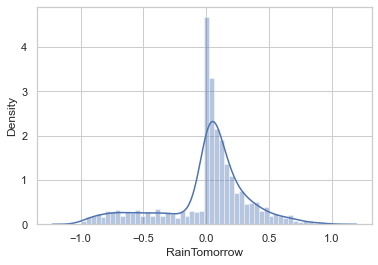

In [86]:
sns.distplot(GF_grid_pred-y_test)

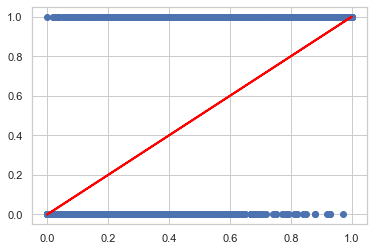

In [87]:
plt.scatter(GF_grid_pred,y_test)
plt.plot(y_test,y_test,linewidth=2,color='Red')

In [88]:
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import warnings
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')

# Logistic Regression

In [89]:
logreg=LogisticRegression()
logreg_score=cross_val_score(logreg,X,Y,cv=5,scoring='accuracy')
print("cross validation score:",np.mean(logreg_score))

cross validation score: 0.8278589765456557


In [90]:
logreg.fit(x_train,y_train)
LR_predicted=logreg.predict(x_test)

print(accuracy_score(y_test,LR_predicted))
print(confusion_matrix(y_test,LR_predicted))
print(classification_report(y_test,LR_predicted))
print("Training accuracy::",logreg.score(x_train,y_train))
print("Test accuracy::",logreg.score(x_test,y_test))

0.8231106243154436
[[1284   97]
 [ 226  219]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      1381
           1       0.69      0.49      0.58       445

    accuracy                           0.82      1826
   macro avg       0.77      0.71      0.73      1826
weighted avg       0.81      0.82      0.81      1826

Training accuracy:: 0.8435980551053485
Test accuracy:: 0.8231106243154436


# DecisionTree Classifier

In [91]:
dtc=DecisionTreeClassifier()
dtc_score=cross_val_score(dtc,X,Y,cv=5,scoring='accuracy')
print("cross validation score for svm:",np.mean(dtc_score))

cross validation score for svm: 0.7197571034344017


In [92]:
dtc.fit(x_train,y_train)
predicted_dtc=dtc.predict(x_test)
print(accuracy_score(y_test,predicted_dtc))
print(confusion_matrix(y_test,predicted_dtc))
print(classification_report(y_test,predicted_dtc))
print("Training accuracy::",dtc.score(x_train,y_train))
print("Test accuracy::",dtc.score(x_test,y_test))

0.7683461117196057
[[1169  212]
 [ 211  234]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1381
           1       0.52      0.53      0.53       445

    accuracy                           0.77      1826
   macro avg       0.69      0.69      0.69      1826
weighted avg       0.77      0.77      0.77      1826

Training accuracy:: 1.0
Test accuracy:: 0.7683461117196057


# KNeighbors Classifier

In [93]:
knn=KNeighborsClassifier()
knn_score=cross_val_score(knn,X,Y,cv=5,scoring='accuracy')
print("cross validation score for knn:",np.mean(knn_score))

cross validation score for knn: 0.7820207778462938


In [94]:
knn.fit(x_train,y_train)
predicted_knn=knn.predict(x_test)
print(accuracy_score(y_test,predicted_knn))
print(confusion_matrix(y_test,predicted_knn))
print(classification_report(y_test,predicted_knn))
print("Training accuracy::",knn.score(x_train,y_train))
print("Test accuracy::",knn.score(x_test,y_test))

0.7951807228915663
[[1260  121]
 [ 253  192]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1381
           1       0.61      0.43      0.51       445

    accuracy                           0.80      1826
   macro avg       0.72      0.67      0.69      1826
weighted avg       0.78      0.80      0.78      1826

Training accuracy:: 0.8660858995137763
Test accuracy:: 0.7951807228915663


# RandomForest Classifier

In [95]:
rfc=RandomForestClassifier()
rfc_score=cross_val_score(rfc,X,Y,cv=5,scoring='accuracy')
print("cross validation score for rfc:",np.mean(rfc_score))

cross validation score for rfc: 0.8006424469839104


In [96]:
rfc.fit(x_train,y_train)
predicted_rfc=rfc.predict(x_test)
print(accuracy_score(y_test,predicted_rfc))
print(confusion_matrix(y_test,predicted_rfc))
print(classification_report(y_test,predicted_rfc))
print("Training accuracy::",rfc.score(x_train,y_train))
print("Test accuracy::",rfc.score(x_test,y_test))

0.8274917853231106
[[1290   91]
 [ 224  221]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      1381
           1       0.71      0.50      0.58       445

    accuracy                           0.83      1826
   macro avg       0.78      0.72      0.74      1826
weighted avg       0.82      0.83      0.82      1826

Training accuracy:: 1.0
Test accuracy:: 0.8274917853231106


# AdaBoost Classifier

In [97]:
adb=AdaBoostClassifier()
adb_score=cross_val_score(adb,X,Y,cv=10,scoring='accuracy')
print("cross validation score for Ada boost:",np.mean(adb_score))

cross validation score for Ada boost: 0.7821466966166433


In [98]:
adb.fit(x_train,y_train)
predicted_adb=adb.predict(x_test)
print(accuracy_score(y_test,predicted_adb))
print(confusion_matrix(y_test,predicted_adb))
print(classification_report(y_test,predicted_adb))
print("Training accuracy::",adb.score(x_train,y_train))
print("Test accuracy::",adb.score(x_test,y_test))

0.828039430449069
[[1280  101]
 [ 213  232]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      1381
           1       0.70      0.52      0.60       445

    accuracy                           0.83      1826
   macro avg       0.78      0.72      0.74      1826
weighted avg       0.82      0.83      0.82      1826

Training accuracy:: 0.8506888168557536
Test accuracy:: 0.828039430449069


# Bagging Classifier

In [99]:
bgc=BaggingClassifier()
bgc_score=cross_val_score(bgc,X,Y,cv=10,scoring='accuracy')
print("cross validation score for BAGGING Classifier:",np.mean(bgc_score))

cross validation score for BAGGING Classifier: 0.7831891917876466


In [100]:
bgc.fit(x_train,y_train)
predicted_bgc=bgc.predict(x_test)
print(accuracy_score(y_test,predicted_bgc))
print(confusion_matrix(y_test,predicted_bgc))
print(classification_report(y_test,predicted_bgc))
print("Training accuracy::",bgc.score(x_train,y_train))
print("Test accuracy::",bgc.score(x_test,y_test))

0.8269441401971522
[[1288   93]
 [ 223  222]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      1381
           1       0.70      0.50      0.58       445

    accuracy                           0.83      1826
   macro avg       0.78      0.72      0.74      1826
weighted avg       0.82      0.83      0.82      1826

Training accuracy:: 0.9870340356564019
Test accuracy:: 0.8269441401971522


# GradientBoosting Classifier

In [101]:
grbc=GradientBoostingClassifier()
grbc_score=cross_val_score(grbc,X,Y,cv=10,scoring='accuracy')
print("cross validation score for Gradient Boosting Classifier:",np.mean(grbc_score))

cross validation score for Gradient Boosting Classifier: 0.7706062685184376


In [102]:
grbc.fit(x_train,y_train)
predicted_grbc=grbc.predict(x_test)
print(accuracy_score(y_test,predicted_grbc))
print(confusion_matrix(y_test,predicted_grbc))
print(classification_report(y_test,predicted_grbc))
print("Training accuracy::",grbc.score(x_train,y_train))
print("Test accuracy::",grbc.score(x_test,y_test))

0.8307776560788609
[[1287   94]
 [ 215  230]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      1381
           1       0.71      0.52      0.60       445

    accuracy                           0.83      1826
   macro avg       0.78      0.72      0.75      1826
weighted avg       0.82      0.83      0.82      1826

Training accuracy:: 0.8776337115072933
Test accuracy:: 0.8307776560788609


# RandomForest Classifier

In [103]:
rfc=RandomForestClassifier()
param_grid={
    'criterion' : ["gini", "entropy"],
    'n_estimators':[200,50],
    'min_samples_split':[2,3],
     'random_state':[10]              
}

In [104]:
rfc_grid=GridSearchCV(RandomForestClassifier(),param_grid,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

In [105]:
rfc_grid.fit(x_train,y_train)
rfc_pred=rfc_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,rfc_pred))

Fitting 4 folds for each of 8 candidates, totalling 32 fits
Accuracy after parameter tuning:: 0.8269441401971522


In [106]:
rfc_grid.best_params_

{'criterion': 'gini',
 'min_samples_split': 3,
 'n_estimators': 50,
 'random_state': 10}

In [107]:
best_param={
    'criterion' : ['gini'],
    'n_estimators':[200],
    'min_samples_split':[2],
     'random_state':[10]    }

In [108]:
best_rfc_grid=GridSearchCV(RandomForestClassifier(),best_param,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

In [109]:
best_rfc_grid.fit(x_train,y_train)
best_rfc_pred=best_rfc_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,best_rfc_pred))

Fitting 4 folds for each of 1 candidates, totalling 4 fits
Accuracy after parameter tuning:: 0.828039430449069


In [110]:
print("CLASSIFICATION REPORT::\n",classification_report(y_test,best_rfc_pred))

CLASSIFICATION REPORT::
               precision    recall  f1-score   support

           0       0.85      0.93      0.89      1381
           1       0.71      0.50      0.58       445

    accuracy                           0.83      1826
   macro avg       0.78      0.72      0.74      1826
weighted avg       0.82      0.83      0.82      1826



<AxesSubplot:>

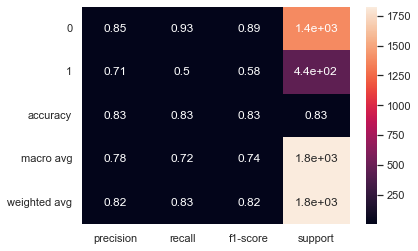

In [111]:
clsf_repo = classification_report(y_test,best_rfc_pred,output_dict=True)
sns.heatmap(pd.DataFrame(clsf_repo).T, annot=True)

In [161]:
import pickle
with open('rainfall.pkl', 'wb') as file:
    pickle.dump(rfc, file)